# Analyse the result data

## Setup

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [21]:
def grouped_mean(df, feature, metric='accuracy'):
    return df.groupby(feature).mean().loc[:, metric]

def influence(df, feature, metric='accuracy'):
    vals = grouped_mean(df, feature, metric)
    return vals.max() - vals.min()

def rankFeatures(df, features, metric='accuracy'):
    influences = [(round(influence(df, feature, metric=metric), 3), feature) for feature in features]
    return sorted(influences, reverse=True)

def make_f1(df):
    cols = list(df.columns)
    if 'cv_step' in cols:
        cols.remove('cv_step')
    if 'max_iter' in cols:
        cols.remove('max_iter')
    df = df.loc[:, cols]
    df['f1'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])
    return df

def plot_heatmap(results, param1, param2, metric):
    print(f'P1: {param1}, P2: {param2}, Metric: {metric}')
    b = results.groupby([param1, param2]).mean()[[metric]].reset_index(level=0).reset_index(level=0)
    b = b.pivot(param1, param2, metric)
    ax = sns.heatmap(b, linewidth=0.1)
    plt.show()

def convert(df, features):
    params = [f'param_{feature}' for feature in features] + ['param_medfilt_kernel_size']
    df = df[params + ['mean_test_accuracy', 'mean_test_recall', 'mean_test_specificity', 'mean_test_precision', 'mean_test_detection_time_mean', 'mean_test_detection_time_std', 'mean_test_detection_time_median']]
    df.columns = *features, 'mk_size', 'accuracy', 'recall', 'specificity', 'precision', 'dt_mean', 'dt_std', 'dt_median'
    return df

In [22]:
METRICS_HIGH = ['accuracy', 'recall', 'specificity', 'precision', 'f1']
METRICS_LOW = ['dt_mean', 'dt_std', 'dt_median']

In [23]:
## Model Features

FEATURES_MODEL_LR    = []
FEATURES_MODEL_LASSO = ['alpha']
FEATURES_MODEL_RIDGE = ['alpha']
FEATURES_MODEL_KNN   = ['n_neighbors', 'weights']
FEATURES_MODEL_MLP   = ['hidden_layer_sizes', 'learning_rate', 'activation']

FEATURES_MODELS_REGR = [FEATURES_MODEL_LR, FEATURES_MODEL_LASSO, FEATURES_MODEL_RIDGE, FEATURES_MODEL_KNN, FEATURES_MODEL_MLP]
FEATURES_MODELS_CLS = [FEATURES_MODEL_KNN, FEATURES_MODEL_MLP]

## Regression-Ensemble

FEATURES_WRAPPER_REGR = ['th_mode', 'th_multiplier', 'th_majority', 'mk_size']

## Classification

FEATURES_WRAPPER_CLS = ['mk_size']

In [24]:
## Ad-Hoc

ADHOC_RESULTS_REGR_LR    = make_f1(pd.read_csv('adhoc/adhoc_regression_lr_mean.csv'))
ADHOC_RESULTS_REGR_LASSO = make_f1(pd.read_csv('adhoc/adhoc_regression_lasso_mean.csv'))
ADHOC_RESULTS_REGR_RIDGE = make_f1(pd.read_csv('adhoc/adhoc_regression_ridge_mean.csv'))
ADHOC_RESULTS_REGR_KNN   = make_f1(pd.read_csv('adhoc/adhoc_regression_knn_mean.csv'))
ADHOC_RESULTS_REGR_MLP   = make_f1(pd.read_csv('adhoc/adhoc_regression_mlp_mean.csv'))

ADHOC_RESULTS_CLS_KNN    = make_f1(convert(pd.read_csv('adhoc/adhoc_classification_knn.csv'), FEATURES_MODEL_KNN))
ADHOC_RESULTS_CLS_MLP    = make_f1(convert(pd.read_csv('adhoc/adhoc_classification_mlp.csv'), FEATURES_MODEL_MLP))

ADHOC_RESULTS_REGR_NAMES = ['[Regression] (Ad-Hoc) Linear Regression', '[Regression] (Ad-Hoc) Lasso Regression', '[Regression] (Ad-Hoc) Ridge Regression', '[Regression] (Ad-Hoc) kNN', '[Regression] (Ad-Hoc) MLP']
ADHOC_RESULTS_REGR = [ADHOC_RESULTS_REGR_LR, ADHOC_RESULTS_REGR_LASSO, ADHOC_RESULTS_REGR_RIDGE, ADHOC_RESULTS_REGR_KNN, ADHOC_RESULTS_REGR_MLP]

ADHOC_RESULTS_CLS_NAMES = ['[Classification] (Ad-Hoc) kNN', '[Classification] (Ad-Hoc) MLP']
ADHOC_RESULTS_CLS = [ADHOC_RESULTS_CLS_KNN, ADHOC_RESULTS_CLS_MLP]

In [25]:
## LeakDB

RESULTS_REGR_LR    = make_f1(pd.read_csv('regression_lr_mean.csv'))
RESULTS_REGR_LASSO = make_f1(pd.read_csv('regression_lasso_mean.csv'))
RESULTS_REGR_RIDGE = make_f1(pd.read_csv('regression_ridge_mean.csv'))
RESULTS_REGR_KNN   = make_f1(pd.read_csv('regression_knn_mean.csv'))
RESULTS_REGR_MLP   = make_f1(pd.read_csv('regression_mlp_mean.csv'))

RESULTS_CLS_KNN    = make_f1(convert(pd.read_csv('new/classification_knn.csv'), FEATURES_MODEL_KNN))
RESULTS_CLS_MLP    = make_f1(convert(pd.read_csv('new/classification_mlp.csv'), FEATURES_MODEL_MLP))

RESULTS_REGR_NAMES = ['[Regression] Linear Regression', '[Regression] Lasso Regression', '[Regression] Ridge Regression', '[Regression] kNN', '[Regression] MLP']
RESULTS_REGR = [RESULTS_REGR_LR, RESULTS_REGR_LASSO, RESULTS_REGR_RIDGE, RESULTS_REGR_KNN, RESULTS_REGR_MLP]

RESULTS_CLS_NAMES = ['[Classification] kNN', '[Classification] MLP']
RESULTS_CLS = [RESULTS_CLS_KNN, RESULTS_CLS_MLP]

In [26]:
## Feature Extraction

FEATURES_FE = ['window', 'past_end']

RESULTS_FE_RIDGE = make_f1(pd.read_csv('new/regression_fe_ridge_mean.csv'))

## Analyse

In [11]:
print('Lengths of Ad-Hoc Result dfs:')
for (name, df) in zip(ADHOC_RESULTS_REGR_NAMES + ADHOC_RESULTS_CLS_NAMES, ADHOC_RESULTS_REGR + ADHOC_RESULTS_CLS):
    print(f'{name:43}-> {len(df)}')

Lengths of Ad-Hoc Result dfs:
[Regression] (Ad-Hoc) Linear Regression    -> 300
[Regression] (Ad-Hoc) Lasso Regression     -> 1800
[Regression] (Ad-Hoc) Ridge Regression     -> 1800
[Regression] (Ad-Hoc) kNN                  -> 2400
[Regression] (Ad-Hoc) MLP                  -> 52200
[Classification] (Ad-Hoc) kNN              -> 40
[Classification] (Ad-Hoc) MLP              -> 900


In [139]:
print('Lengths of LeakDB Result dfs:')
for (name, df) in zip(RESULTS_REGR_NAMES + RESULTS_CLS_NAMES, RESULTS_REGR + RESULTS_CLS):
    print(f'{name:34}-> {len(df)}')

Lengths of LeakDB Result dfs:
[Regression] Linear Regression    -> 300
[Regression] Lasso Regression     -> 1800
[Regression] Ridge Regression     -> 1800
[Regression] kNN                  -> 2400
[Regression] MLP                  -> 54000
[Classification] kNN              -> 40
[Classification] MLP              -> 900


In [280]:
# Meaning of metrics
print('Accuracy\t- Wie oft lag der Algorithmus richtig?')
print('Recall (Sns)\t- Wie gut wurden echte Lecks erkannt?')
print('Specificity\t- Wie gut wurde \'alles ok\' erkannt?')
print('Precision\t- Wie viele erkannte Lecks waren auch wirklich Lecks?')
print('Detection Time\t- Wie viele Zeiteinheiten dauerte es bis zum erkennen?')

Accuracy	- Wie oft lag der Algorithmus richtig?
Recall (Sns)	- Wie gut wurden echte Lecks erkannt?
Specificity	- Wie gut wurde 'alles ok' erkannt?
Precision	- Wie viele erkannte Lecks waren auch wirklich Lecks?
Detection Time	- Wie viele Zeiteinheiten dauerte es bis zum erkennen?


### Maximaler Einfluss

#### Ad-Hoc

In [171]:
for model_name, model_results, model_features in zip(ADHOC_RESULTS_REGR_NAMES, ADHOC_RESULTS_REGR, FEATURES_MODELS_REGR):
    print(model_name)
    for metric in METRICS_HIGH:
        print(f'  -> {metric:30}', end='')
        for inf, feat in rankFeatures(model_results, FEATURES_WRAPPER_REGR + model_features, metric):
            msg = f'{feat} ({inf})'
            print(f'{msg:30}', end='')
        print()
for model_name, model_results, model_features in zip(ADHOC_RESULTS_CLS_NAMES, ADHOC_RESULTS_CLS, FEATURES_MODELS_CLS):
    print(model_name)
    for metric in METRICS_HIGH:
        print(f'  -> {metric:30}', end='')
        for inf, feat in rankFeatures(model_results, FEATURES_WRAPPER_CLS + model_features, metric):
            msg = f'{feat} ({inf})'
            print(f'{msg:30}', end='')
        print()

[Regression] (Ad-Hoc) Linear Regression
  -> accuracy                      th_majority (0.355)           th_multiplier (0.013)         th_mode (0.013)               mk_size (0.01)                
  -> recall                        th_majority (0.71)            th_mode (0.027)               th_multiplier (0.026)         mk_size (0.02)                
  -> specificity                   th_majority (0.002)           mk_size (0.001)               th_multiplier (0.0)           th_mode (0.0)                 
  -> precision                     th_majority (1.0)             th_mode (0.038)               th_multiplier (0.033)         mk_size (0.029)               
  -> f1                            th_majority (0.792)           th_multiplier (0.012)         mk_size (0.008)               th_mode (0.001)               
[Regression] (Ad-Hoc) Lasso Regression
  -> accuracy                      th_majority (0.274)           th_mode (0.029)               mk_size (0.015)               th_multiplier (0

#### LeakDB

In [143]:
for model_name, model_results, model_features in zip(RESULTS_REGR_NAMES, RESULTS_REGR, FEATURES_MODELS_REGR):
    print(model_name)
    for metric in METRICS_HIGH:
        print(f'  -> {metric:30}', end='')
        for inf, feat in rankFeatures(model_results, FEATURES_WRAPPER_REGR + model_features, metric):
            msg = f'{feat} ({inf})'
            print(f'{msg:30}', end='')
        print()
for model_name, model_results, model_features in zip(RESULTS_CLS_NAMES, RESULTS_CLS, FEATURES_MODELS_CLS):
    print(model_name)
    for metric in METRICS_HIGH:
        print(f'  -> {metric:30}', end='')
        for inf, feat in rankFeatures(model_results, FEATURES_WRAPPER_CLS + model_features, metric):
            msg = f'{feat} ({inf})'
            print(f'{msg:30}', end='')
        print()

[Regression] Linear Regression
  -> accuracy                      th_majority (0.414)           th_mode (0.054)               th_multiplier (0.01)          mk_size (0.004)               
  -> recall                        th_majority (0.85)            th_mode (0.111)               th_multiplier (0.021)         mk_size (0.008)               
  -> specificity                   th_majority (0.012)           th_mode (0.002)               th_multiplier (0.001)         mk_size (0.0)                 
  -> precision                     th_majority (1.0)             th_mode (0.025)               mk_size (0.01)                th_multiplier (0.001)         
  -> f1                            th_majority (0.887)           th_mode (0.136)               th_multiplier (0.027)         mk_size (0.011)               
[Regression] Lasso Regression
  -> accuracy                      th_majority (0.338)           th_mode (0.021)               alpha (0.012)                 th_multiplier (0.008)         mk_s

### Die Besten

In [8]:
N_BEST = 10

#### Ad-Hoc

In [144]:
print(ADHOC_RESULTS_REGR_NAMES[0])
ADHOC_RESULTS_REGR[0].nlargest(N_BEST, 'accuracy')

[Regression] (Ad-Hoc) Linear Regression


,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,daytime,1.00,0.1,3,0.914,0.847,0.980,0.978,2.390,4.410,0.1,0.907798
1,daytime,1.00,0.1,5,0.910,0.819,1.000,1.000,2.383,4.560,0.3,0.900495
30,daytime,1.05,0.1,3,0.907,0.826,0.986,0.985,2.395,4.595,0.3,0.898520
2,daytime,1.00,0.1,7,0.900,0.799,1.000,1.000,2.877,5.580,0.3,0.888271
31,daytime,1.05,0.1,5,0.894,0.785,1.000,1.000,2.686,4.548,0.4,0.879552
60,daytime,1.10,0.1,3,0.894,0.799,0.986,0.985,2.612,4.382,0.3,0.882304
120,daytime,1.20,0.1,3,0.893,0.786,1.000,1.000,3.416,5.194,0.5,0.880179
90,daytime,1.15,0.1,3,0.890,0.786,0.993,0.992,2.940,4.734,0.3,0.877066
32,daytime,1.05,0.1,7,0.887,0.773,1.000,1.000,3.270,5.427,0.5,0.871968
61,daytime,1.10,0.1,5,0.883,0.766,1.000,1.000,3.031,4.771,0.4,0.867497


In [145]:
print(ADHOC_RESULTS_REGR_NAMES[1])
ADHOC_RESULTS_REGR[1].nlargest(N_BEST, 'accuracy')

[Regression] (Ad-Hoc) Lasso Regression


,alpha,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
1500,1.998,daytime,1.00,0.1,3,0.970,0.944,0.994,0.992,9.656,7.336,9.2,0.967405
1530,1.998,daytime,1.05,0.1,3,0.966,0.930,1.000,1.000,10.172,7.610,9.6,0.963731
1200,1.665,daytime,1.00,0.1,3,0.957,0.916,0.994,0.991,9.852,7.834,9.6,0.952025
1560,1.998,daytime,1.10,0.1,3,0.957,0.909,1.000,1.000,11.251,8.174,11.1,0.952331
1230,1.665,daytime,1.05,0.1,3,0.953,0.901,1.000,1.000,11.137,8.930,10.5,0.947922
900,1.332,daytime,1.00,0.1,3,0.946,0.901,0.987,0.984,10.019,9.092,9.1,0.940673
1260,1.665,daytime,1.10,0.1,3,0.943,0.881,1.000,1.000,11.706,9.193,11.1,0.936736
1590,1.998,daytime,1.15,0.1,3,0.943,0.881,1.000,1.000,12.186,9.269,11.3,0.936736
930,1.332,daytime,1.05,0.1,3,0.940,0.880,0.994,0.990,10.954,9.614,9.4,0.931765
1290,1.665,daytime,1.15,0.1,3,0.933,0.860,1.000,1.000,12.947,10.107,11.9,0.924731


In [146]:
print(ADHOC_RESULTS_REGR_NAMES[2])
ADHOC_RESULTS_REGR[2].nlargest(N_BEST, 'accuracy')

[Regression] (Ad-Hoc) Ridge Regression


,alpha,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,0.333,daytime,1.00,0.1,3,0.886,0.771,1.0,1.0,2.388,4.177,0.0,0.870695
30,0.333,daytime,1.05,0.1,3,0.886,0.771,1.0,1.0,2.914,4.732,0.2,0.870695
300,0.666,daytime,1.00,0.1,3,0.886,0.771,1.0,1.0,2.388,4.177,0.0,0.870695
330,0.666,daytime,1.05,0.1,3,0.886,0.771,1.0,1.0,2.914,4.732,0.2,0.870695
600,0.999,daytime,1.00,0.1,3,0.886,0.771,1.0,1.0,2.388,4.177,0.0,0.870695
630,0.999,daytime,1.05,0.1,3,0.886,0.771,1.0,1.0,2.914,4.732,0.2,0.870695
900,1.332,daytime,1.00,0.1,3,0.886,0.771,1.0,1.0,2.388,4.177,0.0,0.870695
930,1.332,daytime,1.05,0.1,3,0.886,0.771,1.0,1.0,2.914,4.732,0.2,0.870695
1200,1.665,daytime,1.00,0.1,3,0.886,0.771,1.0,1.0,2.388,4.177,0.0,0.870695
1230,1.665,daytime,1.05,0.1,3,0.886,0.771,1.0,1.0,2.914,4.732,0.2,0.870695


In [172]:
print(ADHOC_RESULTS_REGR_NAMES[3])
ADHOC_RESULTS_REGR[3].nlargest(N_BEST, 'accuracy')

[Regression] (Ad-Hoc) kNN


,n_neighbors,weights,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
392,3,uniform,daytime,1.15,0.1,7,1.0,1.0,1.0,1.0,8.752,7.686,7.4,1.0
422,3,uniform,daytime,1.20,0.1,7,1.0,1.0,1.0,1.0,9.360,7.801,8.5,1.0
452,3,uniform,simple,1.00,0.1,7,1.0,1.0,1.0,1.0,10.028,7.934,9.1,1.0
481,3,uniform,simple,1.05,0.1,5,1.0,1.0,1.0,1.0,9.278,7.364,8.5,1.0
482,3,uniform,simple,1.05,0.1,7,1.0,1.0,1.0,1.0,10.329,7.991,9.5,1.0
511,3,uniform,simple,1.10,0.1,5,1.0,1.0,1.0,1.0,9.724,7.525,9.0,1.0
540,3,uniform,simple,1.15,0.1,3,1.0,1.0,1.0,1.0,7.542,6.069,7.1,1.0
541,3,uniform,simple,1.15,0.1,5,1.0,1.0,1.0,1.0,9.758,7.519,9.3,1.0
570,3,uniform,simple,1.20,0.1,3,1.0,1.0,1.0,1.0,7.756,6.032,7.4,1.0
901,5,uniform,daytime,1.00,0.1,5,1.0,1.0,1.0,1.0,7.294,6.739,6.0,1.0


In [9]:
print(ADHOC_RESULTS_REGR_NAMES[4])
ADHOC_RESULTS_REGR[4].nlargest(N_BEST, 'accuracy')

[Regression] (Ad-Hoc) MLP


,hidden_layer_sizes,learning_rate,activation,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,"(5, 12, 12)",adaptive,logistic,daytime,1.00,0.1,3,1.0,1.0,1.0,1.0,12.032,8.002,10.9,1.0
30,"(5, 12, 12)",adaptive,logistic,daytime,1.05,0.1,3,1.0,1.0,1.0,1.0,12.214,8.143,11.1,1.0
600,"(5, 12, 12)",adaptive,tanh,daytime,1.00,0.1,3,1.0,1.0,1.0,1.0,15.017,7.450,15.3,1.0
601,"(5, 12, 12)",adaptive,tanh,daytime,1.00,0.1,5,1.0,1.0,1.0,1.0,15.202,7.405,15.3,1.0
630,"(5, 12, 12)",adaptive,tanh,daytime,1.05,0.1,3,1.0,1.0,1.0,1.0,15.112,7.494,15.6,1.0
631,"(5, 12, 12)",adaptive,tanh,daytime,1.05,0.1,5,1.0,1.0,1.0,1.0,15.484,7.487,16.0,1.0
660,"(5, 12, 12)",adaptive,tanh,daytime,1.10,0.1,3,1.0,1.0,1.0,1.0,15.176,7.531,15.6,1.0
661,"(5, 12, 12)",adaptive,tanh,daytime,1.10,0.1,5,1.0,1.0,1.0,1.0,15.720,7.515,16.2,1.0
690,"(5, 12, 12)",adaptive,tanh,daytime,1.15,0.1,3,1.0,1.0,1.0,1.0,15.463,7.567,16.1,1.0
691,"(5, 12, 12)",adaptive,tanh,daytime,1.15,0.1,5,1.0,1.0,1.0,1.0,15.948,7.530,16.5,1.0


In [147]:
print(ADHOC_RESULTS_CLS_NAMES[0])
ADHOC_RESULTS_CLS[0].nlargest(N_BEST, 'accuracy')

[Classification] (Ad-Hoc) kNN


,n_neighbors,weights,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,3,uniform,3,1.0,1.0,1.0,1.0,0.515028,1.145809,0.0,1.0
1,3,distance,3,1.0,1.0,1.0,1.0,0.515028,1.145809,0.0,1.0
2,5,uniform,3,1.0,1.0,1.0,1.0,0.608986,1.242398,0.0,1.0
3,5,distance,3,1.0,1.0,1.0,1.0,0.602535,1.242665,0.0,1.0
4,7,uniform,3,1.0,1.0,1.0,1.0,0.663813,1.288697,0.0,1.0
5,7,distance,3,1.0,1.0,1.0,1.0,0.651806,1.290481,0.0,1.0
6,9,uniform,3,1.0,1.0,1.0,1.0,0.763775,1.452735,0.0,1.0
7,9,distance,3,1.0,1.0,1.0,1.0,0.739966,1.452084,0.0,1.0
8,3,uniform,5,1.0,1.0,1.0,1.0,0.515028,1.145809,0.0,1.0
9,3,distance,5,1.0,1.0,1.0,1.0,0.515028,1.145809,0.0,1.0


In [10]:
print(ADHOC_RESULTS_CLS_NAMES[1])
ADHOC_RESULTS_CLS[1].nlargest(N_BEST, 'accuracy')

[Classification] (Ad-Hoc) MLP


,hidden_layer_sizes,learning_rate,activation,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
120,"(18, 22)",constant,logistic,3,1.000000,1.000000,1.0,1.0,4.635860,6.833748,0.6,1.000000
655,"(21, 18)",adaptive,relu,3,1.000000,1.000000,1.0,1.0,4.169758,6.752596,0.3,1.000000
55,"(21, 18)",adaptive,logistic,3,0.996667,0.993548,1.0,1.0,4.618002,6.883254,0.7,0.996764
856,"(16, 19, 5)",adaptive,relu,5,0.996667,0.994444,1.0,1.0,5.450331,7.831252,1.2,0.997214
30,"(14, 15)",constant,logistic,3,0.993333,0.988235,1.0,1.0,4.669195,7.190548,0.9,0.994083
10,"(14,)",constant,logistic,3,0.990000,0.982680,1.0,1.0,6.267892,9.431129,1.3,0.991264
40,"(11, 10)",constant,logistic,3,0.990000,0.981784,1.0,1.0,5.528532,7.985894,1.5,0.990808
70,"(21, 5, 12)",constant,logistic,3,0.990000,0.982110,1.0,1.0,6.906537,9.355390,2.3,0.990975
80,"(16,)",constant,logistic,3,0.990000,0.982680,1.0,1.0,5.913779,8.881671,1.4,0.991264
136,"(15, 24)",adaptive,logistic,5,0.990000,0.983333,1.0,1.0,5.262417,7.494034,0.8,0.991597


#### LeakDB

In [148]:
print(RESULTS_REGR_NAMES[0])
RESULTS_REGR[0].nlargest(N_BEST, 'accuracy')

[Regression] Linear Regression


,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,daytime,1.00,0.1,3,0.958,0.948,0.968,0.968,7.476,16.489,0.2,0.957896
60,daytime,1.10,0.1,3,0.956,0.932,0.980,0.979,7.366,15.308,0.1,0.954922
90,daytime,1.15,0.1,3,0.956,0.932,0.980,0.979,7.883,16.769,0.2,0.954922
1,daytime,1.00,0.1,5,0.954,0.932,0.976,0.975,6.788,11.153,0.3,0.953015
31,daytime,1.05,0.1,5,0.954,0.928,0.980,0.979,7.491,13.983,0.3,0.952818
32,daytime,1.05,0.1,7,0.954,0.928,0.980,0.979,7.782,14.199,0.5,0.952818
61,daytime,1.10,0.1,5,0.954,0.928,0.980,0.979,8.494,17.515,0.5,0.952818
120,daytime,1.20,0.1,3,0.954,0.928,0.980,0.979,8.470,18.693,0.2,0.952818
2,daytime,1.00,0.1,7,0.952,0.928,0.976,0.975,7.458,13.495,0.5,0.950920
30,daytime,1.05,0.1,3,0.952,0.932,0.972,0.971,6.670,13.438,0.1,0.951100


In [149]:
print(RESULTS_REGR_NAMES[1])
RESULTS_REGR[1].nlargest(N_BEST, 'accuracy')

[Regression] Lasso Regression


,alpha,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,0.333,daytime,1.00,0.1,3,0.932,0.890,0.976,0.974,11.185,28.436,0.0,0.930107
30,0.333,daytime,1.05,0.1,3,0.930,0.882,0.981,0.978,11.147,27.429,0.0,0.927523
1,0.333,daytime,1.00,0.1,5,0.924,0.873,0.976,0.974,11.380,27.784,0.0,0.920738
31,0.333,daytime,1.05,0.1,5,0.918,0.857,0.981,0.977,10.156,23.179,0.0,0.913074
60,0.333,daytime,1.10,0.1,3,0.916,0.854,0.981,0.977,9.914,25.032,0.0,0.911369
120,0.333,daytime,1.20,0.1,3,0.916,0.846,0.988,0.986,8.352,16.470,0.2,0.910651
2,0.333,daytime,1.00,0.1,7,0.914,0.849,0.981,0.977,10.305,23.875,0.2,0.908514
90,0.333,daytime,1.15,0.1,3,0.914,0.846,0.985,0.981,7.448,14.029,0.0,0.908512
91,0.333,daytime,1.15,0.1,5,0.912,0.838,0.988,0.986,9.745,19.602,0.0,0.905996
121,0.333,daytime,1.20,0.1,5,0.912,0.834,0.992,0.991,9.513,17.761,0.8,0.905747


In [150]:
print(RESULTS_REGR_NAMES[2])
RESULTS_REGR[2].nlargest(N_BEST, 'accuracy')

[Regression] Ridge Regression


,alpha,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,0.333,daytime,1.00,0.1,3,0.950,0.942,0.960,0.958,7.868,18.789,0.0,0.949933
300,0.666,daytime,1.00,0.1,3,0.950,0.942,0.960,0.958,7.868,18.789,0.0,0.949933
600,0.999,daytime,1.00,0.1,3,0.950,0.942,0.960,0.958,7.868,18.789,0.0,0.949933
900,1.332,daytime,1.00,0.1,3,0.950,0.942,0.960,0.958,7.868,18.789,0.0,0.949933
1200,1.665,daytime,1.00,0.1,3,0.950,0.942,0.960,0.958,7.868,18.789,0.0,0.949933
1500,1.998,daytime,1.00,0.1,3,0.950,0.942,0.960,0.958,7.868,18.789,0.0,0.949933
90,0.333,daytime,1.15,0.1,3,0.946,0.926,0.967,0.967,8.527,17.114,0.1,0.946056
390,0.666,daytime,1.15,0.1,3,0.946,0.926,0.967,0.967,8.527,17.114,0.1,0.946056
690,0.999,daytime,1.15,0.1,3,0.946,0.926,0.967,0.967,8.527,17.114,0.1,0.946056
990,1.332,daytime,1.15,0.1,3,0.946,0.926,0.967,0.967,8.527,17.114,0.1,0.946056


In [151]:
print(RESULTS_REGR_NAMES[3])
RESULTS_REGR[3].nlargest(N_BEST, 'accuracy')

[Regression] kNN


,n_neighbors,weights,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
423,3,uniform,daytime,1.20,0.2,3,0.672,0.447,0.897,0.812,65.971,67.718,42.5,0.576591
393,3,uniform,daytime,1.15,0.2,3,0.666,0.447,0.885,0.795,65.861,67.752,41.5,0.572246
363,3,uniform,daytime,1.10,0.2,3,0.660,0.459,0.861,0.768,63.418,66.057,36.6,0.574592
420,3,uniform,daytime,1.20,0.1,3,0.660,0.539,0.781,0.710,56.991,66.815,25.1,0.612794
422,3,uniform,daytime,1.20,0.1,7,0.656,0.431,0.880,0.789,74.929,71.915,53.1,0.557474
1021,5,uniform,daytime,1.20,0.1,5,0.654,0.391,0.916,0.823,71.148,70.003,48.8,0.530137
333,3,uniform,daytime,1.05,0.2,3,0.652,0.463,0.841,0.744,61.204,64.921,35.6,0.570790
390,3,uniform,daytime,1.15,0.1,3,0.652,0.547,0.757,0.692,56.177,66.533,24.1,0.611015
394,3,uniform,daytime,1.15,0.2,5,0.652,0.395,0.908,0.809,71.626,67.260,55.1,0.530822
421,3,uniform,daytime,1.20,0.1,5,0.652,0.479,0.825,0.734,68.367,71.008,39.6,0.579697


In [152]:
print(RESULTS_REGR_NAMES[4])
RESULTS_REGR[4].nlargest(N_BEST, 'accuracy')

[Regression] MLP


,hidden_layer_sizes,learning_rate,activation,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
9360,"(7, 6)",adaptive,relu,daytime,1.10,0.1,3,0.960,0.926,0.993,0.991,9.759,29.455,0.2,0.957398
9390,"(7, 6)",adaptive,relu,daytime,1.15,0.1,3,0.960,0.917,1.000,1.000,9.445,29.896,0.2,0.956703
9330,"(7, 6)",adaptive,relu,daytime,1.05,0.1,3,0.958,0.930,0.985,0.982,8.478,25.861,0.2,0.955293
9302,"(7, 6)",adaptive,relu,daytime,1.00,0.1,7,0.956,0.930,0.982,0.978,10.794,31.645,0.4,0.953396
9331,"(7, 6)",adaptive,relu,daytime,1.05,0.1,5,0.956,0.923,0.989,0.986,10.369,32.342,0.2,0.953460
9332,"(7, 6)",adaptive,relu,daytime,1.05,0.1,7,0.956,0.919,0.993,0.991,11.797,34.539,0.4,0.953643
9361,"(7, 6)",adaptive,relu,daytime,1.10,0.1,5,0.956,0.915,0.996,0.995,11.155,36.840,0.2,0.953325
10230,"(7, 6)",constant,relu,daytime,1.05,0.1,3,0.956,0.920,0.993,0.990,8.630,27.280,0.0,0.953717
10260,"(7, 6)",constant,relu,daytime,1.10,0.1,3,0.956,0.920,0.993,0.990,10.576,32.015,0.1,0.953717
10290,"(7, 6)",constant,relu,daytime,1.15,0.1,3,0.956,0.916,0.996,0.995,10.304,31.311,0.1,0.953867


In [153]:
print(RESULTS_CLS_NAMES[0])
RESULTS_CLS[0].nlargest(N_BEST, 'accuracy')

[Classification] kNN


,n_neighbors,weights,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
36,7,uniform,11,0.954,0.980169,0.928097,0.930877,8.799511,21.565035,0.0,0.954887
38,9,uniform,11,0.954,0.980169,0.928097,0.930877,9.557034,25.064112,0.0,0.954887
30,9,uniform,9,0.950,0.980169,0.921200,0.923268,8.373114,21.010354,0.0,0.950868
39,9,distance,11,0.946,0.980169,0.913497,0.916133,8.774147,21.234468,0.0,0.947069
31,9,distance,9,0.944,0.980169,0.909241,0.912756,8.329162,20.989318,0.0,0.945262
28,7,uniform,9,0.944,0.980169,0.908342,0.913219,8.344539,21.261314,0.0,0.945510
37,7,distance,11,0.944,0.980169,0.910048,0.912704,8.773082,21.561978,0.0,0.945234
34,5,uniform,11,0.942,0.980169,0.903994,0.910326,8.363873,21.369218,0.0,0.943957
22,9,uniform,7,0.940,0.980169,0.900638,0.906271,7.644015,20.742418,0.0,0.941772
35,5,distance,11,0.936,0.980169,0.892360,0.900406,8.383883,21.362188,0.0,0.938596


In [154]:
print(RESULTS_CLS_NAMES[1])
RESULTS_CLS[1].nlargest(N_BEST, 'accuracy')

[Classification] MLP


,hidden_layer_sizes,learning_rate,activation,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
744,"(22, 24, 6)",constant,relu,11,0.960,0.959818,0.959965,0.960915,5.369258,11.446436,0.0,0.960366
836,"(9, 22)",adaptive,relu,5,0.958,0.959733,0.956439,0.956427,6.799350,16.201768,0.0,0.958077
737,"(19, 13, 24)",adaptive,relu,7,0.956,0.967896,0.943965,0.946898,9.573595,29.124219,0.0,0.957282
787,"(18, 8, 22)",adaptive,relu,7,0.956,0.955887,0.956056,0.957358,5.990226,15.038487,0.0,0.956622
716,"(16, 14, 19)",adaptive,relu,5,0.954,0.976144,0.932419,0.934651,6.459528,16.380157,0.0,0.954947
813,"(11, 22)",constant,relu,9,0.952,0.952041,0.952360,0.953098,7.497679,16.722003,0.2,0.952569
661,"(23, 7)",constant,relu,5,0.950,0.955972,0.944351,0.944915,5.332328,11.515237,0.0,0.950411
871,"(16, 22, 13)",constant,relu,5,0.950,0.959733,0.940168,0.943064,5.276033,15.307527,0.0,0.951325
874,"(16, 22, 13)",constant,relu,11,0.950,0.972534,0.929001,0.934251,8.395833,23.822904,0.0,0.953008
718,"(16, 14, 19)",adaptive,relu,9,0.946,0.960053,0.932093,0.935316,6.083318,14.905687,0.0,0.947523


In [156]:
best = []
for metric in METRICS_HIGH:
    cur = RESULTS_REGR_LR.iloc[[RESULTS_REGR_LR.loc[:, metric].idxmax()], :].copy()
    cur['metric'] = metric
    cur['model'] = 'lr'
    best.append(cur)
for metric in METRICS_LOW:
    cur = RESULTS_REGR_LR.iloc[[RESULTS_REGR_LR.loc[:, metric].idxmin()], :].copy()
    cur['metric'] = metric
    cur['model'] = 'lr'
    best.append(cur)
best = pd.concat(best)
best.set_index(['model', 'metric'])

th_mode  th_multiplier  th_majority  mk_size  accuracy  \
model metric                                                                
lr    accuracy     daytime           1.00          0.1        3     0.958   
      recall       daytime           1.00          0.1        3     0.958   
      specificity  daytime           1.00          0.2        3     0.944   
      precision    daytime           1.00          0.2        3     0.944   
      f1           daytime           1.00          0.1        3     0.958   
      dt_mean       simple           1.15          0.3        3     0.760   
      dt_std       daytime           1.00          0.8        3     0.506   
      dt_median     simple           1.00          0.1        3     0.888   

                   recall  specificity  precision       dt_mean  dt_std  \
model metric                                                              
lr    accuracy      0.948        0.968      0.968  7.476000e+00  16.489   
      recall        0.948        0.968      0.968  7.476000e+00  16.489   
      specificity   0.887        1.000      1.000  8.318000e+00  18.258   
      precision     0.887        1.000      1.000  8.318000e+00  18.258   
      f1            0.948        0.968      0.968  7.476000e+00  16.489   
      dt_mean       0.513        1.000      1.000  4.347000e+00   8.080   
      dt_std        0.000        1.000      0.000  1.000000e+09   0.000   
      dt_median     0.785        0.988      0.986  4.846000e+00   9.247   

                     dt_median        f1  
model metric                              
lr    accuracy             0.2  0.957896  
      recall               0.2  0.957896  
      specificity          0.2  0.940117  
      precision            0.2  0.940117  
      f1                   0.2  0.957896  
      dt_mean              0.0  0.678123  
      dt_std       999999999.0       NaN  
      dt_median            0.0  0.874094

### Rekursive Suche

In [31]:
def recursive_best(results, features, wrapper_features, main_metric='accuracy'):
    current_results = results
    selected_best_values = {}
    for feature in list(zip(*rankFeatures(results, wrapper_features + features, main_metric)))[1]:
        print(f'### Feature: {feature}')
        print(f'Before selected best values: {selected_best_values}')
        feature_values = current_results[feature].unique()
        print(f'Possible values for this feature: {feature_values}')
        best_value = grouped_mean(current_results, feature, metric=main_metric).idxmax()
        print(f'Best value for this feature: {best_value}')
        for plot_metric in METRICS_HIGH[:4]:
            grouped_mean(current_results, feature, metric=plot_metric).plot(legend=True,).legend(loc='lower left')#, figsize=(12,4))
        plt.show()
        current_results = current_results[current_results[feature] == best_value]
        selected_best_values[feature] = best_value

#### Ad-Hoc

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


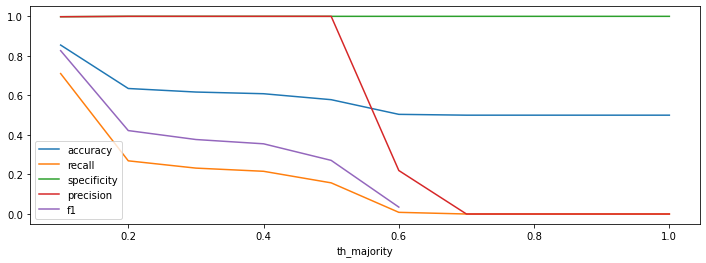

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


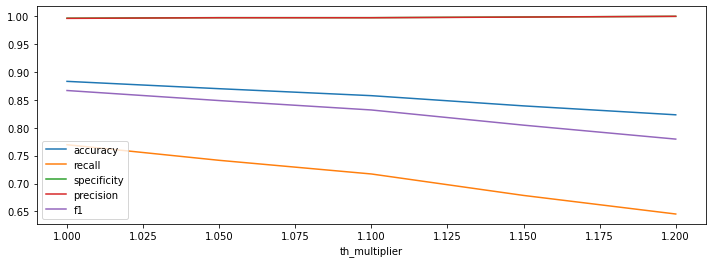

### Feature: th_mode
Before selected best values: {'th_majority': 0.1, 'th_multiplier': 1.0}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


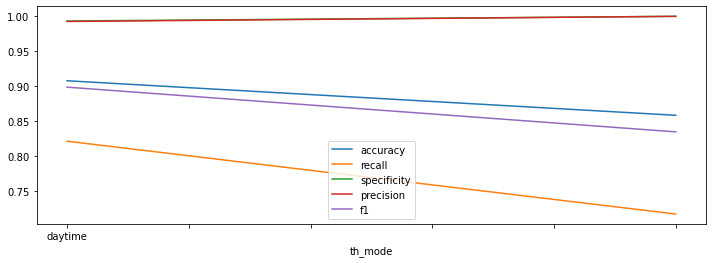

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_multiplier': 1.0, 'th_mode': 'daytime'}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


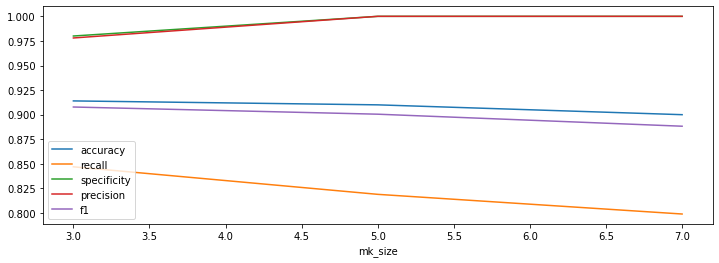

In [158]:
recursive_best(ADHOC_RESULTS_REGR_LR, FEATURES_MODEL_LR, FEATURES_WRAPPER_REGR)

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


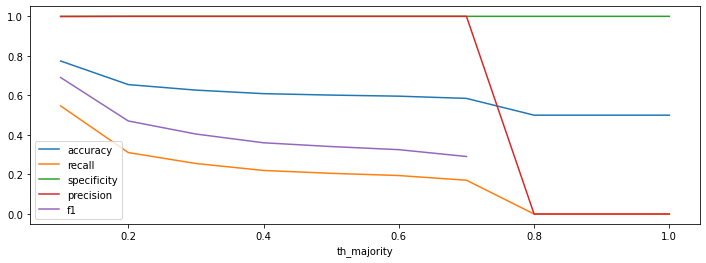

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


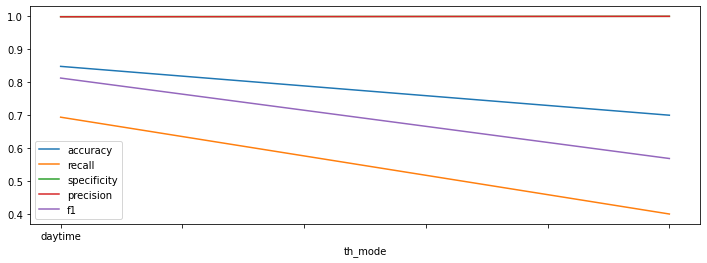

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


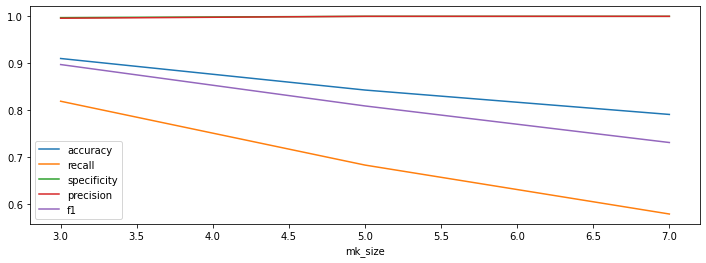

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'mk_size': 3}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


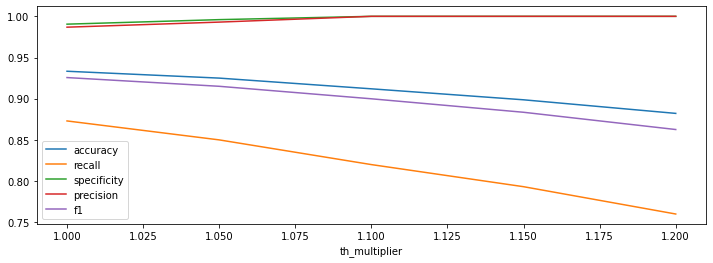

### Feature: alpha
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'mk_size': 3, 'th_multiplier': 1.0}
Possible values for this feature: [0.333 0.666 0.999 1.332 1.665 1.998]
Best value for this feature: 1.998


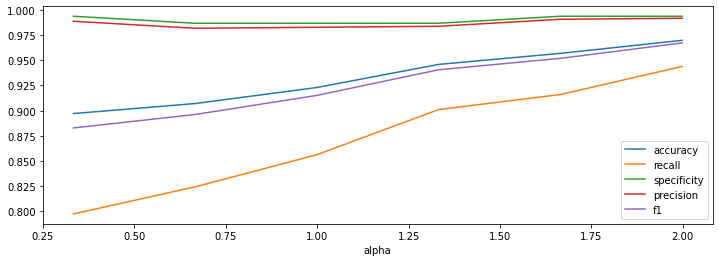

In [159]:
recursive_best(ADHOC_RESULTS_REGR_LASSO, FEATURES_MODEL_LASSO, FEATURES_WRAPPER_REGR)

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


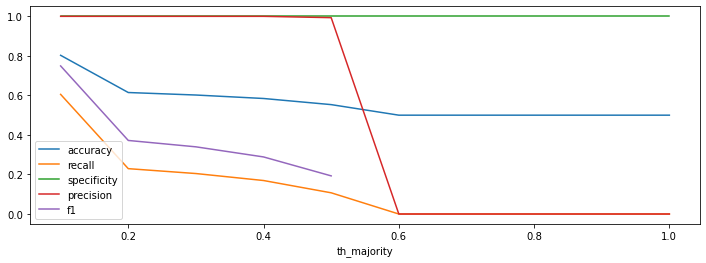

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


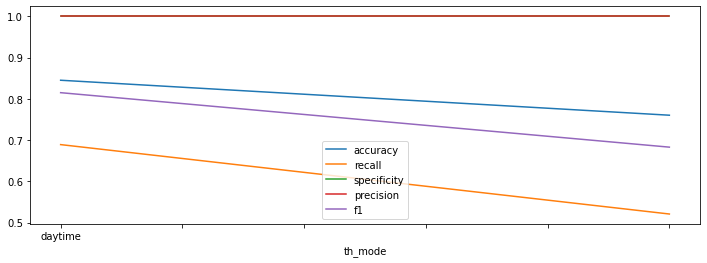

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


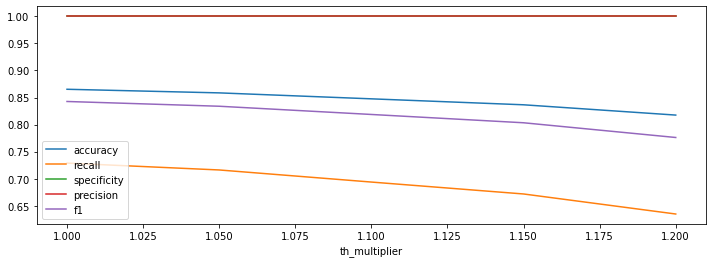

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


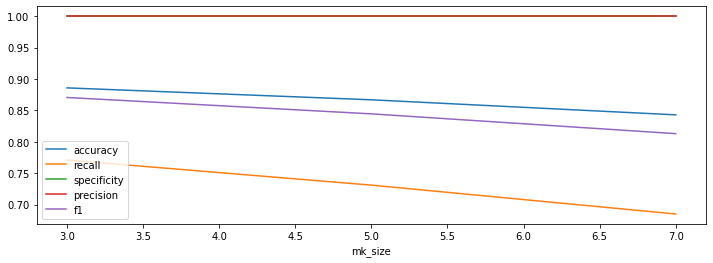

### Feature: alpha
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0, 'mk_size': 3}
Possible values for this feature: [0.333 0.666 0.999 1.332 1.665 1.998]
Best value for this feature: 0.333


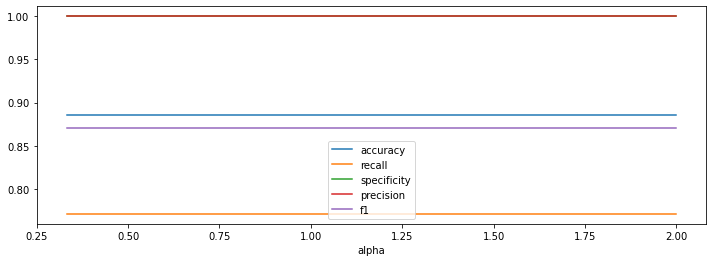

In [160]:
recursive_best(ADHOC_RESULTS_REGR_RIDGE, FEATURES_MODEL_RIDGE, FEATURES_WRAPPER_REGR)

### Feature: weights
Before selected best values: {}
Possible values for this feature: ['uniform' 'distance']
Best value for this feature: distance


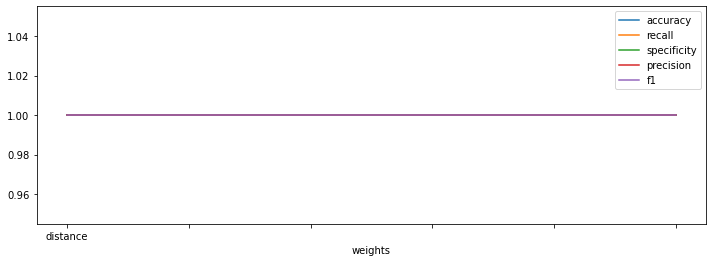

### Feature: n_neighbors
Before selected best values: {'weights': 'distance'}
Possible values for this feature: [3 5 7 9]
Best value for this feature: 3


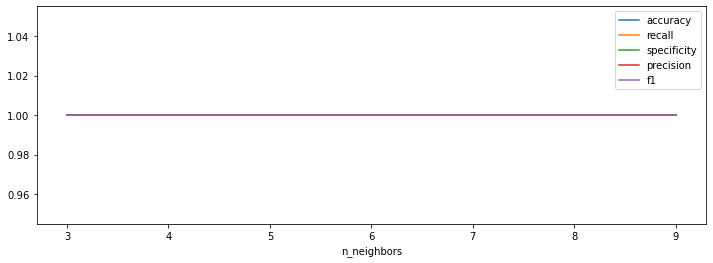

### Feature: mk_size
Before selected best values: {'weights': 'distance', 'n_neighbors': 3}
Possible values for this feature: [ 3  5  7  9 11]
Best value for this feature: 3


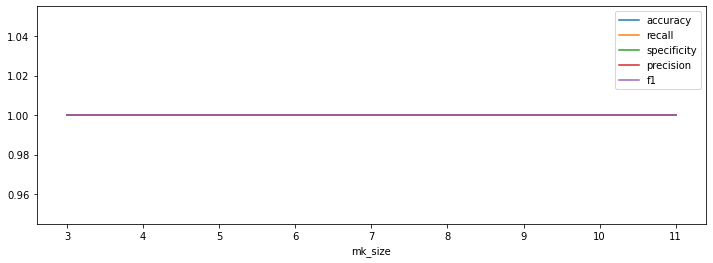

In [161]:
recursive_best(ADHOC_RESULTS_CLS_KNN, FEATURES_MODEL_KNN, FEATURES_WRAPPER_CLS)

#### LeakDB

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


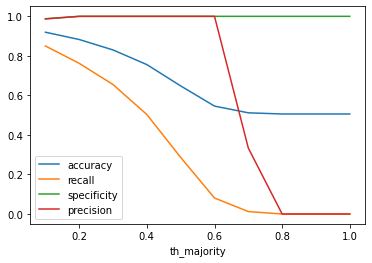

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


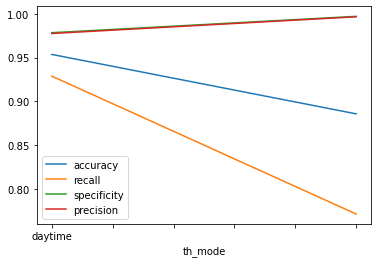

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


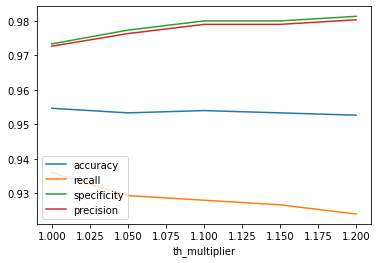

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


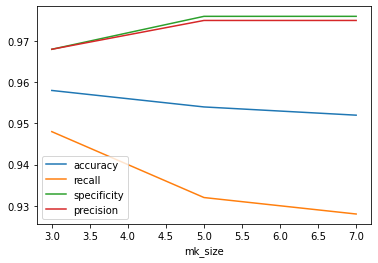

In [13]:
recursive_best(RESULTS_REGR_LR, FEATURES_MODEL_LR, FEATURES_WRAPPER_REGR)

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


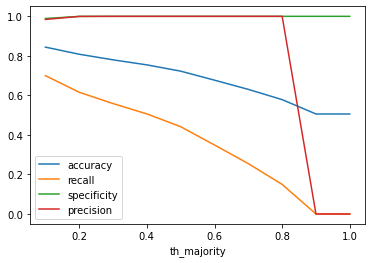

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


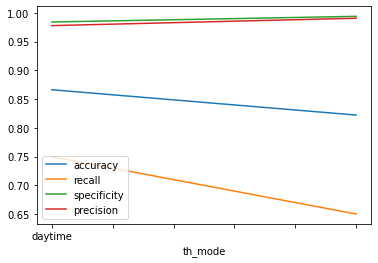

### Feature: alpha
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [0.333 0.666 0.999 1.332 1.665 1.998]
Best value for this feature: 0.333


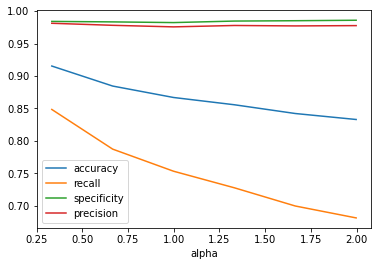

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'alpha': 0.333}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


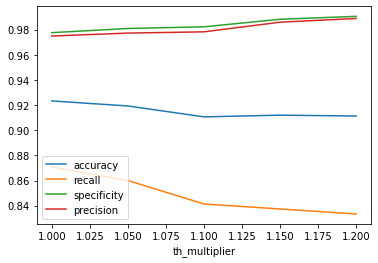

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'alpha': 0.333, 'th_multiplier': 1.0}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


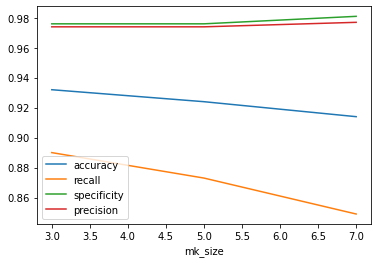

In [278]:
recursive_best(RESULTS_REGR_LASSO, FEATURES_MODEL_LASSO, FEATURES_WRAPPER_REGR)

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


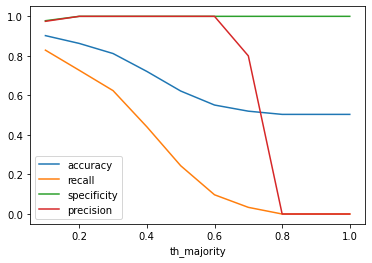

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


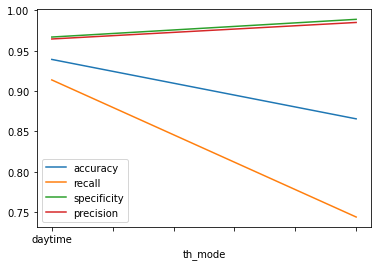

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


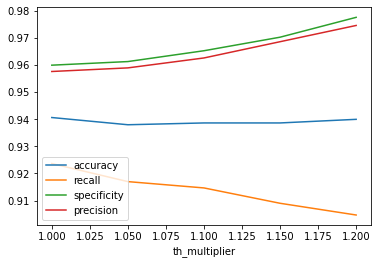

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


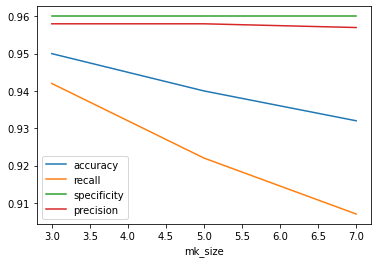

### Feature: alpha
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0, 'mk_size': 3}
Possible values for this feature: [0.333 0.666 0.999 1.332 1.665 1.998]
Best value for this feature: 0.333


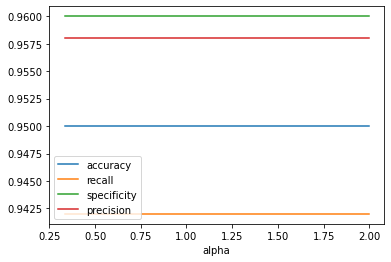

In [279]:
recursive_best(RESULTS_REGR_RIDGE, FEATURES_MODEL_RIDGE, FEATURES_WRAPPER_REGR)

### Feature: weights
Before selected best values: {}
Possible values for this feature: ['distance' 'uniform']
Best value for this feature: uniform


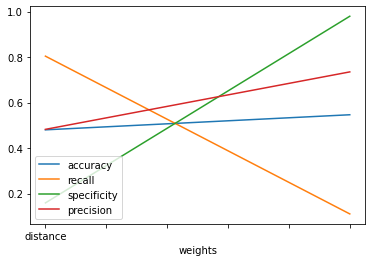

### Feature: th_majority
Before selected best values: {'weights': 'uniform'}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


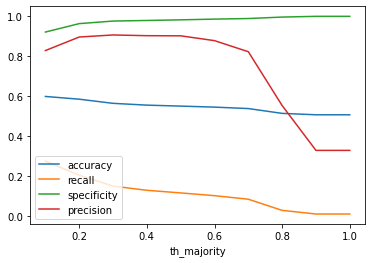

### Feature: th_mode
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


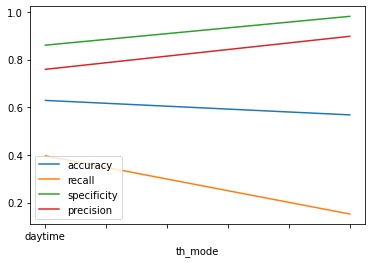

### Feature: n_neighbors
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [3 5 7 9]
Best value for this feature: 3


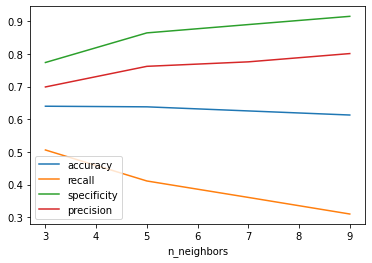

### Feature: mk_size
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1, 'th_mode': 'daytime', 'n_neighbors': 3}
Possible values for this feature: [3 5 7]
Best value for this feature: 7


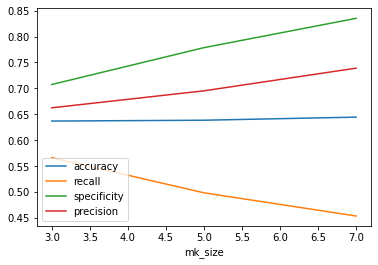

### Feature: th_multiplier
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1, 'th_mode': 'daytime', 'n_neighbors': 3, 'mk_size': 7}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.2


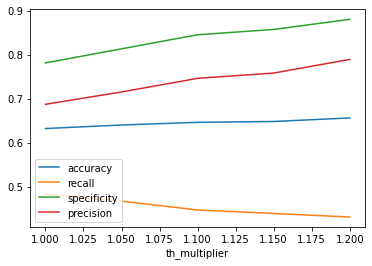

In [32]:
recursive_best(RESULTS_REGR_KNN, FEATURES_MODEL_KNN, FEATURES_WRAPPER_REGR)

### Feature: activation
Before selected best values: {}
Possible values for this feature: ['logistic' 'relu' 'tanh']
Best value for this feature: relu


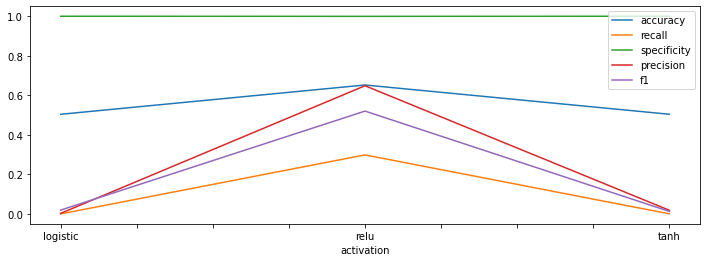

### Feature: th_majority
Before selected best values: {'activation': 'relu'}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


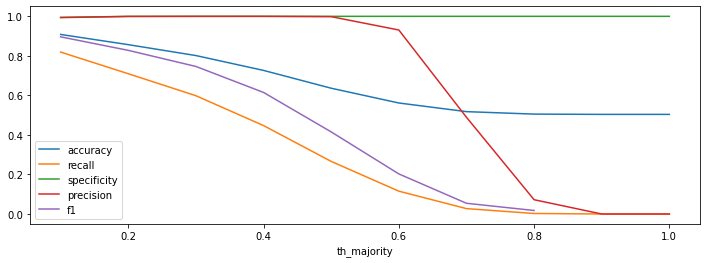

### Feature: th_mode
Before selected best values: {'activation': 'relu', 'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


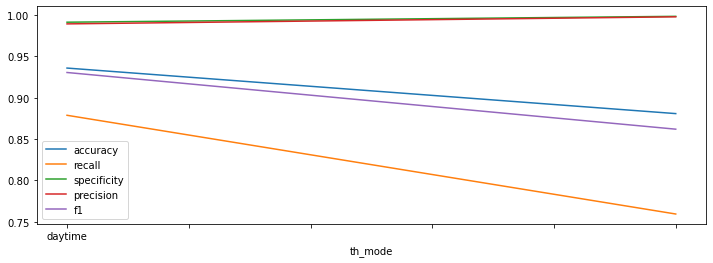

### Feature: hidden_layer_sizes
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: ['(5,)' '(5, 12)' '(5, 24, 18)' '(6, 23)' '(7,)' '(7, 6)' '(8, 12)'
 '(9, 5)' '(9, 8, 8)' '(9, 11)' '(9, 14, 21)' '(9, 20, 22)' '(9, 22, 15)'
 '(10,)' '(10, 8, 5)' '(10, 18, 14)' '(11, 13)' '(12,)' '(13,)' '(14,)'
 '(16, 9, 23)' '(16, 17)' '(18,)' '(19, 12, 19)' '(19, 22, 16)'
 '(20, 20, 15)' '(21,)' '(22, 12)' '(24,)' '(24, 8)']
Best value for this feature: (7, 6)


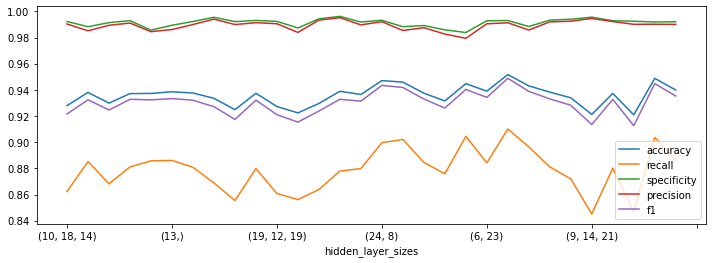

### Feature: th_multiplier
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.05


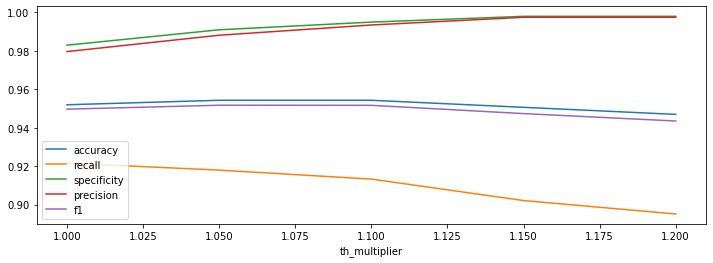

### Feature: mk_size
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)', 'th_multiplier': 1.05}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


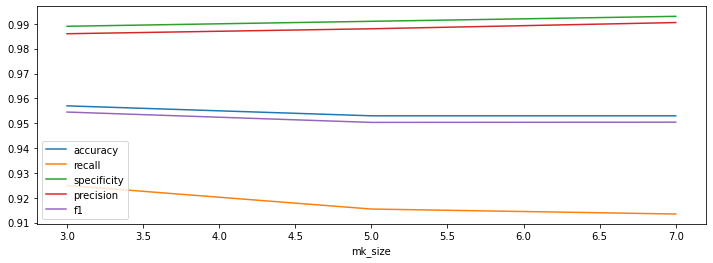

### Feature: learning_rate
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)', 'th_multiplier': 1.05, 'mk_size': 3}
Possible values for this feature: ['adaptive' 'constant']
Best value for this feature: adaptive


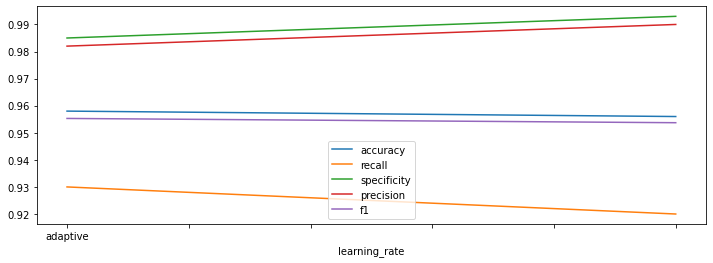

In [166]:
recursive_best(RESULTS_REGR_MLP, FEATURES_MODEL_MLP, FEATURES_WRAPPER_REGR)

### Feature: activation
Before selected best values: {}
Possible values for this feature: ['logistic' 'relu' 'tanh']
Best value for this feature: relu


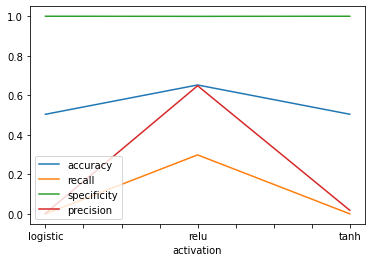

### Feature: th_majority
Before selected best values: {'activation': 'relu'}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


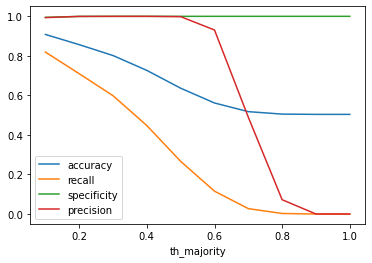

### Feature: th_mode
Before selected best values: {'activation': 'relu', 'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


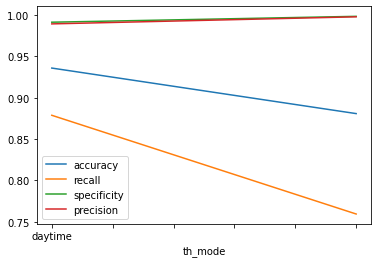

### Feature: hidden_layer_sizes
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: ['(5,)' '(5, 12)' '(5, 24, 18)' '(6, 23)' '(7,)' '(7, 6)' '(8, 12)'
 '(9, 5)' '(9, 8, 8)' '(9, 11)' '(9, 14, 21)' '(9, 20, 22)' '(9, 22, 15)'
 '(10,)' '(10, 8, 5)' '(10, 18, 14)' '(11, 13)' '(12,)' '(13,)' '(14,)'
 '(16, 9, 23)' '(16, 17)' '(18,)' '(19, 12, 19)' '(19, 22, 16)'
 '(20, 20, 15)' '(21,)' '(22, 12)' '(24,)' '(24, 8)']
Best value for this feature: (7, 6)


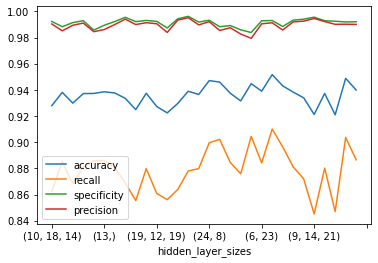

### Feature: th_multiplier
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.05


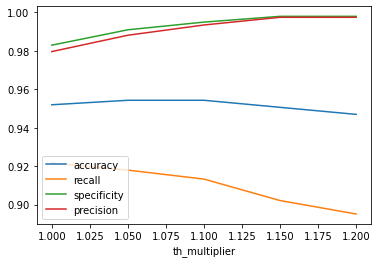

### Feature: mk_size
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)', 'th_multiplier': 1.05}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


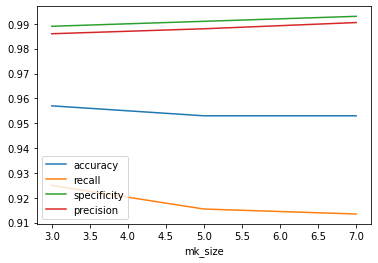

### Feature: learning_rate
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)', 'th_multiplier': 1.05, 'mk_size': 3}
Possible values for this feature: ['adaptive' 'constant']
Best value for this feature: adaptive


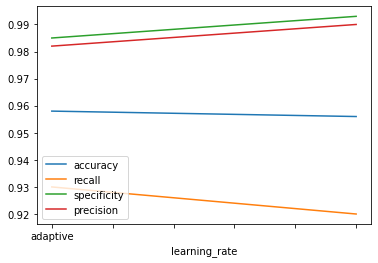

In [274]:
# Nochmal aber sorted hidden_layer_sizes
layer_df_list = recursive_best(RESULTS_REGR_MLP, FEATURES_MODEL_MLP, FEATURES_WRAPPER_REGR)

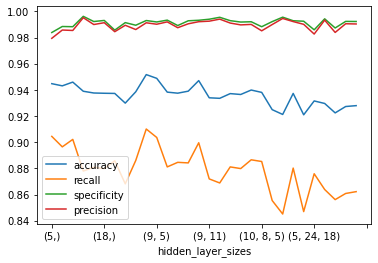

In [260]:
for layer_df in layer_df_list[:4]:
    layer_df.sort_index(key=lambda l: l.str.find(')')).plot(legend=True)
plt.show()

### Feature: mk_size
Before selected best values: {}
Possible values for this feature: [ 3  5  7  9 11]
Best value for this feature: 11


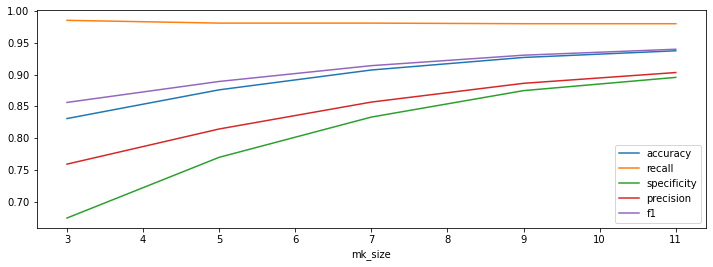

### Feature: n_neighbors
Before selected best values: {'mk_size': 11}
Possible values for this feature: [3 5 7 9]
Best value for this feature: 9


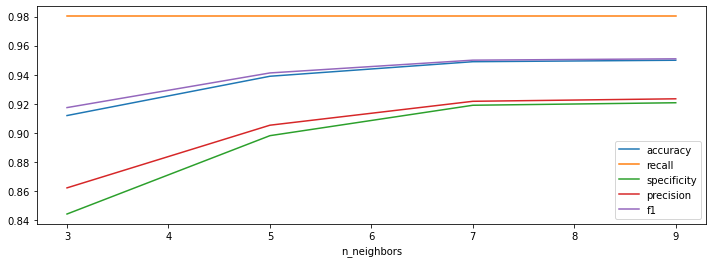

### Feature: weights
Before selected best values: {'mk_size': 11, 'n_neighbors': 9}
Possible values for this feature: ['uniform' 'distance']
Best value for this feature: uniform


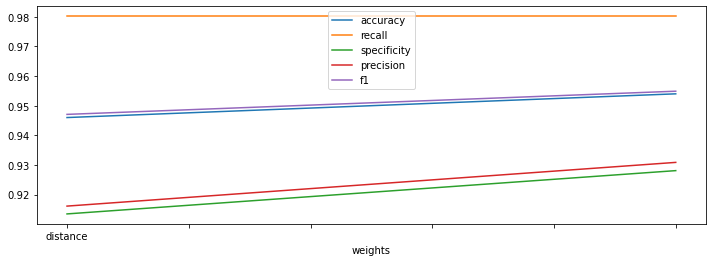

In [167]:
recursive_best(RESULTS_CLS_KNN, FEATURES_MODEL_KNN, FEATURES_WRAPPER_CLS)

### Feature: hidden_layer_sizes
Before selected best values: {}
Possible values for this feature: ['(23,)' '(21, 5)' '(21,)' '(8, 17)' '(15,)' '(11, 18)' '(23, 7)' '(6,)'
 '(10,)' '(16, 14, 19)' '(21, 15)' '(19, 13, 24)' '(22, 24, 6)' '(18,)'
 '(11, 7)' '(23, 6)' '(18, 8, 22)' '(14, 22)' '(11, 22)' '(9, 22)' '(22,)'
 '(10, 18, 19)' '(8,)' '(16, 22, 13)' '(19,)' '(11, 24)']
Best value for this feature: (11, 24)


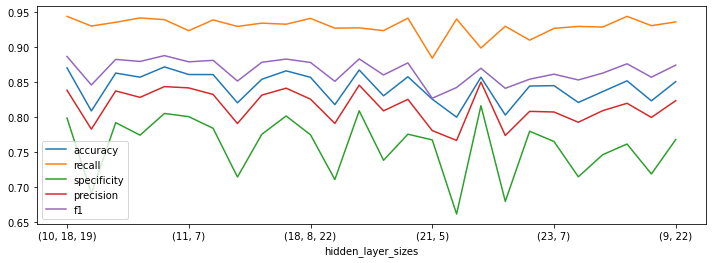

### Feature: mk_size
Before selected best values: {'hidden_layer_sizes': '(11, 24)'}
Possible values for this feature: [ 3  5  7  9 11]
Best value for this feature: 11


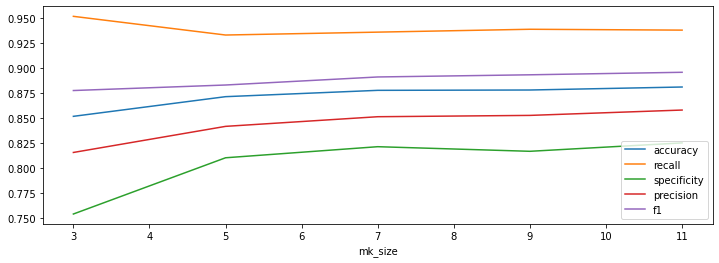

### Feature: activation
Before selected best values: {'hidden_layer_sizes': '(11, 24)', 'mk_size': 11}
Possible values for this feature: ['logistic' 'tanh' 'relu']
Best value for this feature: relu


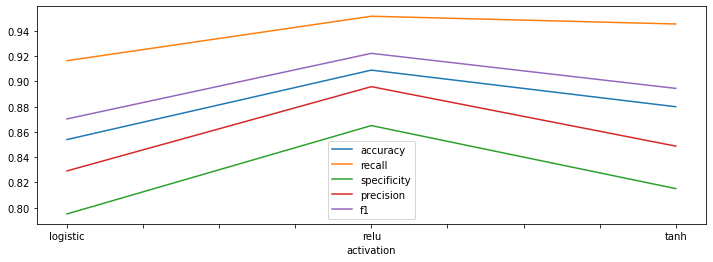

### Feature: learning_rate
Before selected best values: {'hidden_layer_sizes': '(11, 24)', 'mk_size': 11, 'activation': 'relu'}
Possible values for this feature: ['constant' 'adaptive']
Best value for this feature: constant


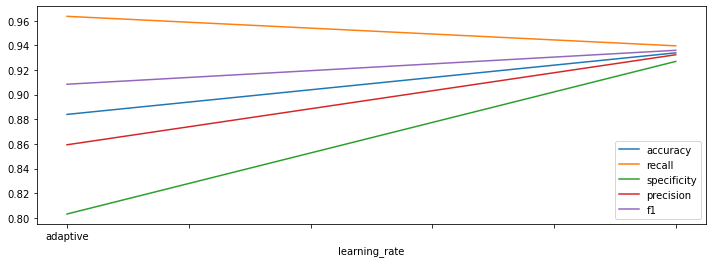

In [168]:
recursive_best(RESULTS_CLS_MLP, FEATURES_MODEL_MLP, FEATURES_WRAPPER_CLS)

### Einzelne Plots

<AxesSubplot:xlabel='th_majority'>

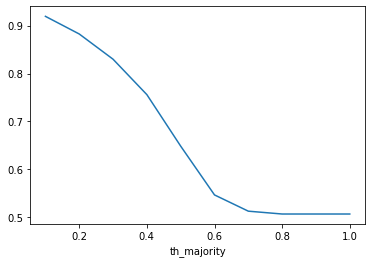

In [38]:
grouped_mean(RESULTS_LR, 'th_majority', metric='accuracy').plot()

<AxesSubplot:xlabel='th_multiplier'>

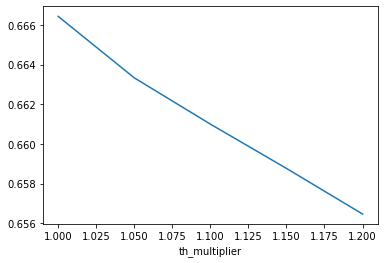

In [25]:
grouped_mean(RESULTS_LR, 'th_multiplier', metric='accuracy').plot()

<AxesSubplot:xlabel='mk_size'>

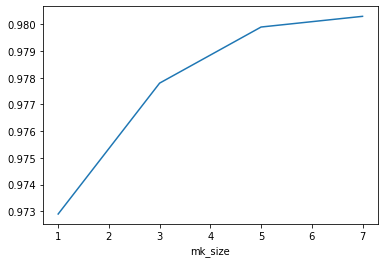

In [15]:
grouped_mean(RESULTS_LR[RESULTS_LR['th_majority'] == 0.1], 'mk_size', metric='precision').plot()

In [16]:
grouped_mean(RESULTS_LR, 'th_mode', metric='accuracy')

th_mode
daytime    0.68885
simple     0.63674
Name: accuracy, dtype: float64

### 2D

In [17]:
RESULTS_LR

,th_mode,th_multiplier,th_majority,mk_size,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,daytime,1.0,0.1,1,0.950,0.935,0.965,0.963,4.916000e+00,18.244,0.0,0.948793
1,daytime,1.0,0.1,3,0.946,0.920,0.972,0.971,7.306000e+00,17.305,0.0,0.944812
2,daytime,1.0,0.1,5,0.946,0.916,0.976,0.974,8.403000e+00,18.478,0.0,0.944110
3,daytime,1.0,0.1,7,0.938,0.899,0.976,0.974,1.199100e+01,31.620,0.0,0.934998
4,daytime,1.0,0.2,1,0.946,0.891,1.000,1.000,8.920000e+00,29.873,0.0,0.942359
...,...,...,...,...,...,...,...,...,...,...,...,...
395,simple,1.2,0.9,7,0.506,0.000,1.000,0.000,1.000000e+09,0.000,999999999.0,NaN
396,simple,1.2,1.0,1,0.506,0.000,1.000,0.000,1.000000e+09,0.000,999999999.0,NaN
397,simple,1.2,1.0,3,0.506,0.000,1.000,0.000,1.000000e+09,0.000,999999999.0,NaN
398,simple,1.2,1.0,5,0.506,0.000,1.000,0.000,1.000000e+09,0.000,999999999.0,NaN


In [7]:
RESULTS_LR.groupby(['th_majority', 'th_multiplier']).mean()

mk_size  accuracy    recall  specificity  \
th_majority th_multiplier                                             
0.1         1.00                 5  0.921333  0.859167     0.982000   
            1.05                 5  0.920667  0.853167     0.986667   
            1.10                 5  0.921000  0.851167     0.989333   
            1.15                 5  0.919333  0.847167     0.990000   
            1.20                 5  0.916000  0.839833     0.990667   
0.2         1.00                 5  0.891333  0.779833     1.000000   
            1.05                 5  0.885000  0.766667     1.000000   
            1.10                 5  0.882667  0.762000     1.000000   
            1.15                 5  0.878000  0.752500     1.000000   
            1.20                 5  0.876667  0.749833     1.000000   
0.3         1.00                 5  0.843667  0.682667     1.000000   
            1.05                 5  0.834333  0.663500     1.000000   
            1.10                 5  0.828333  0.651333     1.000000   
            1.15                 5  0.824333  0.643667     1.000000   
            1.20                 5  0.819000  0.633000     1.000000   
0.4         1.00                 5  0.768000  0.528500     1.000000   
            1.05                 5  0.761333  0.514500     1.000000   
            1.10                 5  0.754667  0.500667     1.000000   
            1.15                 5  0.750000  0.491167     1.000000   
            1.20                 5  0.745000  0.480833     1.000000   
0.5         1.00                 5  0.661000  0.312667     1.000000   
            1.05                 5  0.655000  0.300167     1.000000   
            1.10                 5  0.647667  0.285500     1.000000   
            1.15                 5  0.641333  0.272667     1.000000   
            1.20                 5  0.635000  0.260000     1.000000   
0.6         1.00                 5  0.548667  0.086333     1.000000   
            1.05                 5  0.546667  0.082333     1.000000   
            1.10                 5  0.546000  0.081000     1.000000   
            1.15                 5  0.545000  0.079167     1.000000   
            1.20                 5  0.543333  0.075667     1.000000   
0.7         1.00                 5  0.512333  0.013167     1.000000   
            1.05                 5  0.512333  0.013167     1.000000   
            1.10                 5  0.511667  0.011833     1.000000   
            1.15                 5  0.511667  0.011833     1.000000   
            1.20                 5  0.511667  0.011833     1.000000   
0.8         1.00                 5  0.506000  0.000000     1.000000   
            1.05                 5  0.506000  0.000000     1.000000   
            1.10                 5  0.506000  0.000000     1.000000   
            1.15                 5  0.506000  0.000000     1.000000   
            1.20                 5  0.506000  0.000000     1.000000   
0.9         1.00                 5  0.506000  0.000000     1.000000   
            1.05                 5  0.506000  0.000000     1.000000   
            1.10                 5  0.506000  0.000000     1.000000   
            1.15                 5  0.506000  0.000000     1.000000   
            1.20                 5  0.506000  0.000000     1.000000   
1.0         1.00                 5  0.506000  0.000000     1.000000   
            1.05                 5  0.506000  0.000000     1.000000   
            1.10                 5  0.506000  0.000000     1.000000   
            1.15                 5  0.506000  0.000000     1.000000   
            1.20                 5  0.506000  0.000000     1.000000   

                           precision       dt_mean     dt_std     dt_median  \
th_majority th_multiplier                                                     
0.1         1.00            0.981000  6.282500e+00  11.618500  1.833333e-01   
            1.05            0.985667  6.888333e+00  13.446833  3.000000e-01   
            1.10  

In [14]:
bladf = pd.DataFrame({'f1': [1,1,1,2,2,2,1,1,1,2,2,2], 'f2': [1,2,3,1,2,3,1,2,3,1,2,3], 'f3': [5,5,5,5,5,5,6,6,6,6,6,6], 'm': [1,2,3,4,5,6,10,11,12,13,14,15]})

In [13]:
bladf.set_index(['f3', 'f1', 'f2'])

m
f3 f1 f2    
5  1  1    1
      2    2
      3    3
   2  1    4
      2    5
      3    6
6  1  1   10
      2   11
      3   12
   2  1   13
      2   14
      3   15

In [19]:
bladf.groupby(['f1', 'f2']).mean()

f3     m
f1 f2           
1  1   5.5   5.5
   2   5.5   6.5
   3   5.5   7.5
2  1   5.5   8.5
   2   5.5   9.5
   3   5.5  10.5

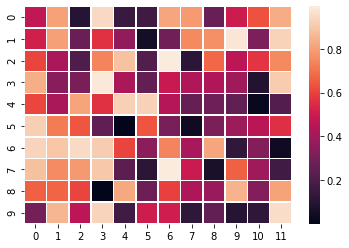

In [21]:
import numpy as np
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()

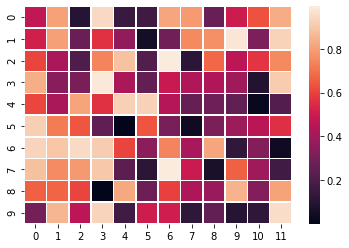

In [22]:
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()

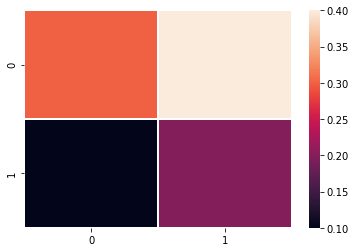

In [23]:
ax = sns.heatmap([[0.3,0.4], [0.1, 0.2]], linewidth=0.5)
plt.show()

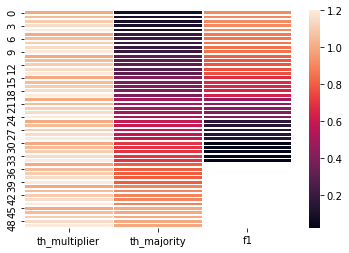

In [38]:
ax = sns.heatmap(df, linewidth=0.5)
plt.show()

In [49]:
grouped = RESULTS_LR.groupby(['th_majority', 'th_multiplier']).mean()[['f1']]
grouped

f1
th_majority th_multiplier          
0.1         1.00           0.913840
            1.05           0.912416
            1.10           0.912495
            1.15           0.910335
            1.20           0.906077
0.2         1.00           0.872649
            1.05           0.863379
            1.10           0.859954
            1.15           0.853257
            1.20           0.851616
0.3         1.00           0.805215
            1.05           0.790242
            1.10           0.781096
            1.15           0.775459
            1.20           0.767513
0.4         1.00           0.682876
            1.05           0.670534
            1.10           0.658687
            1.15           0.650253
            1.20           0.641007
0.5         1.00           0.470227
            1.05           0.455621
            1.10           0.437554
            1.15           0.422824
            1.20           0.407308
0.6         1.00           0.157441
            1.05           0.150882
            1.10           0.148698
            1.15           0.145592
            1.20           0.139629
0.7         1.00           0.025223
            1.05           0.025223
            1.10           0.022793
            1.15           0.022793
            1.20           0.022793
0.8         1.00                NaN
            1.05                NaN
            1.10                NaN
            1.15                NaN
            1.20                NaN
0.9         1.00                NaN
            1.05                NaN
            1.10                NaN
            1.15                NaN
            1.20                NaN
1.0         1.00                NaN
            1.05                NaN
            1.10                NaN
            1.15                NaN
            1.20                NaN

In [31]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [39]:
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [57]:
grouped.reset_index(level=0).reset_index(level=0)

,th_multiplier,th_majority,f1
0,1.00,0.1,0.913840
1,1.05,0.1,0.912416
2,1.10,0.1,0.912495
3,1.15,0.1,0.910335
4,1.20,0.1,0.906077
5,1.00,0.2,0.872649
6,1.05,0.2,0.863379
7,1.10,0.2,0.859954
8,1.15,0.2,0.853257
9,1.20,0.2,0.851616


In [42]:
df = df.pivot('th_multiplier', 'th_majority', 'f1')

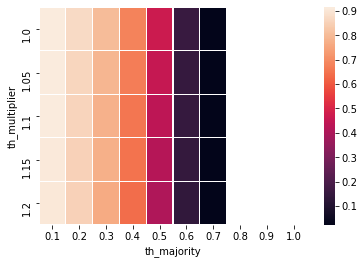

In [44]:
ax = sns.heatmap(df, linewidth=0.1)
plt.show()

In [17]:
def plot2d(results, metric):
    b = results.groupby(['th_majority', 'th_multiplier']).mean()[[metric]].reset_index(level=0).reset_index(level=0)
    b = b.pivot('th_multiplier', 'th_majority', metric)
    ax = sns.heatmap(b)
    plt.show()

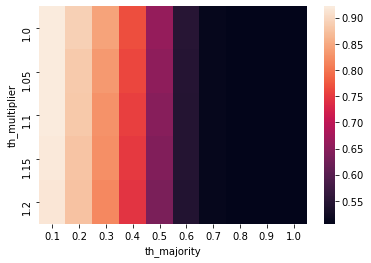

In [18]:
plot2d(RESULTS_REGR_LR, 'accuracy')

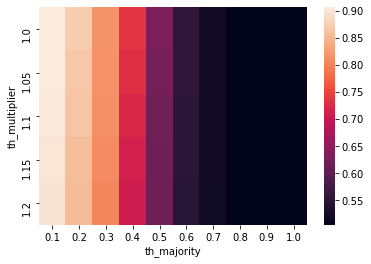

In [19]:
plot2d(RESULTS_REGR_RIDGE, 'accuracy')

accuracy


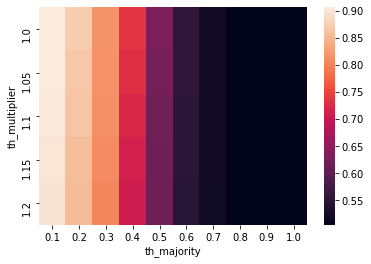

recall


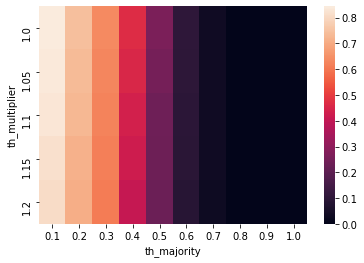

specificity


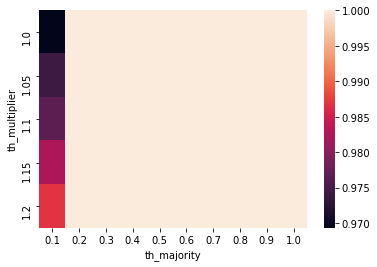

precision


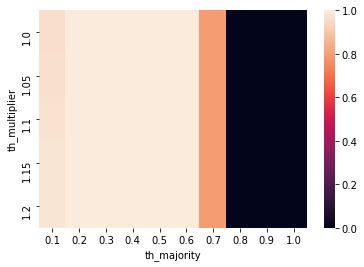

f1


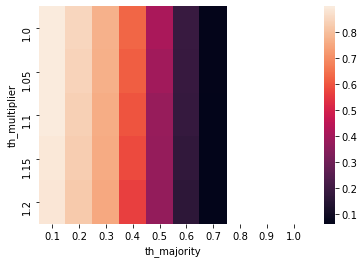

In [20]:
for metric in METRICS_HIGH:
    print(metric)
    plot2d(RESULTS_REGR_RIDGE, metric)

### Feature Extraction

In [69]:
RESULTS_FE_RIDGE

,window,past_end,accuracy,recall,specificity,precision,dt_mean,dt_std,dt_median,f1
0,1,1,0.952,0.930,0.972,0.971,8.314,17.898,0.0,0.950058
1,1,2,0.932,0.870,0.992,0.991,7.783,16.954,0.0,0.926566
2,1,3,0.928,0.873,0.980,0.978,9.973,22.530,0.0,0.922522
3,1,4,0.936,0.895,0.976,0.973,10.454,22.930,0.2,0.932372
4,1,5,0.942,0.905,0.976,0.975,9.622,23.691,0.0,0.938697
5,2,1,0.948,0.927,0.967,0.967,8.425,21.013,0.3,0.946578
6,2,2,0.938,0.886,0.988,0.986,8.946,21.125,0.5,0.933329
7,2,3,0.934,0.888,0.976,0.973,10.344,24.763,0.0,0.928559
8,2,4,0.950,0.915,0.985,0.982,8.468,17.743,0.0,0.947317
9,2,5,0.944,0.902,0.988,0.987,9.082,20.657,0.0,0.942588


In [70]:
for metric in METRICS_HIGH:
    print(f'  -> {metric:30}', end='')
    for inf, feat in rankFeatures(RESULTS_FE_RIDGE, FEATURES_FE, metric):
        msg = f'{feat} ({inf})'
        print(f'{msg:30}', end='')
    print()

  -> accuracy                      past_end (0.022)              window (0.008)                
  -> recall                        past_end (0.058)              window (0.01)                 
  -> specificity                   window (0.021)                past_end (0.021)              
  -> precision                     window (0.024)                past_end (0.021)              
  -> f1                            past_end (0.024)              window (0.009)                


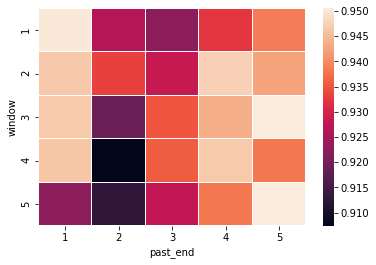

In [198]:
df = RESULTS_FE_RIDGE.pivot('window', 'past_end', 'f1')
ax = sns.heatmap(df, linewidth=0.1)
plt.show()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


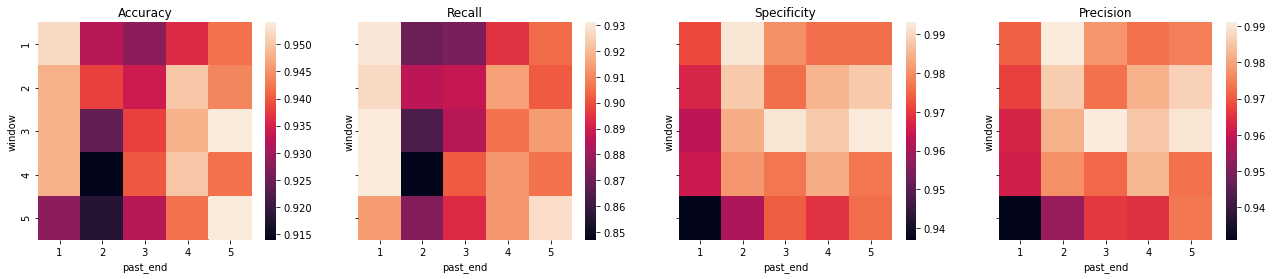

In [203]:
f, axs = plt.subplots(1, 4, figsize=(22, 4), sharey=True)
print(axs)
for metric, ax in zip(METRICS_HIGH, axs):
    plt.sca(ax)
    df = RESULTS_FE_RIDGE.pivot('window', 'past_end', metric)
    ax1 = sns.heatmap(df, cbar=True)
    plt.title(metric.capitalize())
plt.show()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


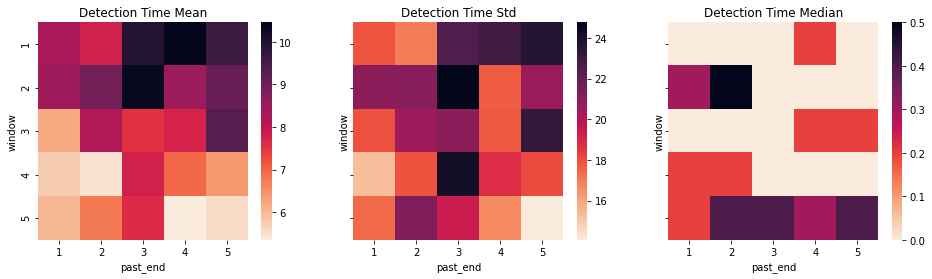

In [18]:
f, axs = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
print(axs)
for metric, ax, name in zip(METRICS_LOW, axs, ['Mean', 'Std', 'Median']):
    plt.sca(ax)
    df = RESULTS_FE_RIDGE.pivot('window', 'past_end', metric)
    ax1 = sns.heatmap(df, cbar=True, cmap=sns.cm.rocket_r)
    plt.title('Detection Time ' + name)
plt.show()

### Detection Time

In [79]:
def recursive_best_dt(results, features, wrapper_features, main_metric='accuracy'):
    current_results = results
    selected_best_values = {}
    for feature in list(zip(*rankFeatures(results, wrapper_features + features, main_metric)))[1]:
        print(f'### Feature: {feature}')
        print(f'Before selected best values: {selected_best_values}')
        feature_values = current_results[feature].unique()
        print(f'Possible values for this feature: {feature_values}')
        best_value = grouped_mean(current_results, feature, metric=main_metric).idxmax()
        print(f'Best value for this feature: {best_value}')
        grouped_mean(current_results, feature, metric='dt_mean').plot(legend=True, lw=5).legend(loc='lower left')
        for plot_metric in METRICS_LOW[1:]:
            grouped_mean(current_results, feature, metric=plot_metric).plot(legend=True).legend(loc='lower left')#, figsize=(12,4))
        plt.show()
        current_results = current_results[current_results[feature] == best_value]
        selected_best_values[feature] = best_value
    #return layer_df_list

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


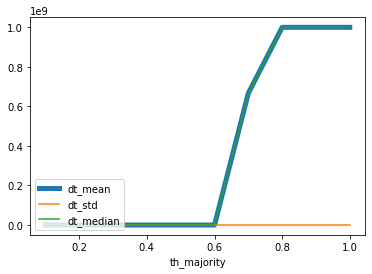

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


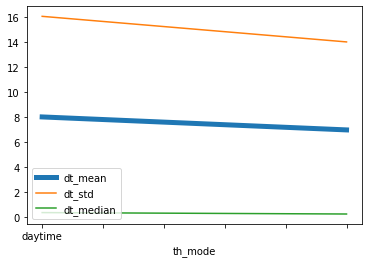

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


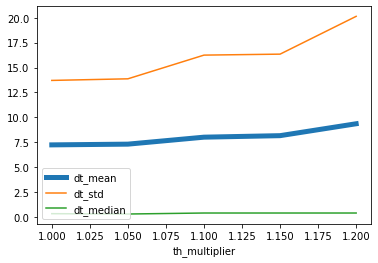

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


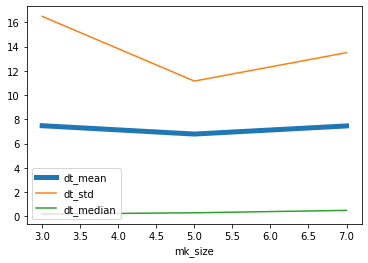

In [54]:
recursive_best_dt(RESULTS_REGR_LR, FEATURES_MODEL_LR, FEATURES_WRAPPER_REGR)

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


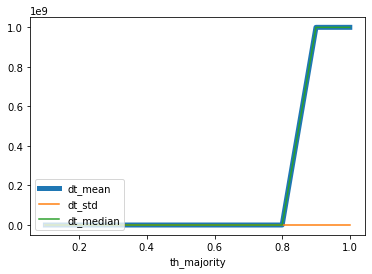

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


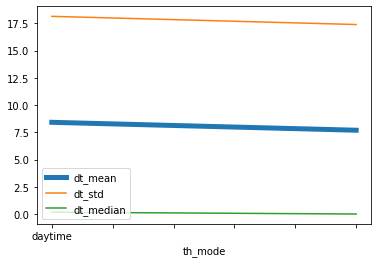

### Feature: alpha
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [0.333 0.666 0.999 1.332 1.665 1.998]
Best value for this feature: 0.333


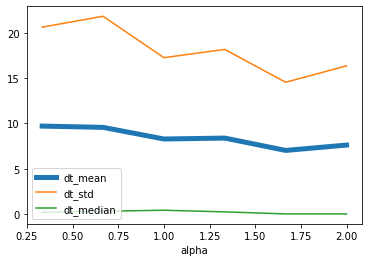

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'alpha': 0.333}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


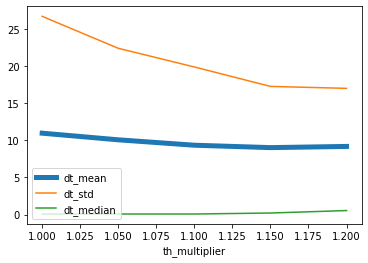

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'alpha': 0.333, 'th_multiplier': 1.0}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


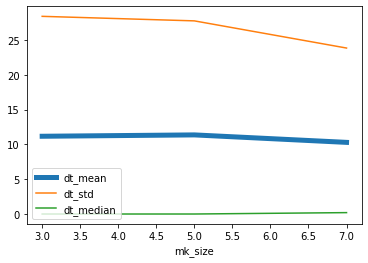

In [55]:
recursive_best_dt(RESULTS_REGR_LASSO, FEATURES_MODEL_LASSO, FEATURES_WRAPPER_REGR)

### Feature: th_majority
Before selected best values: {}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


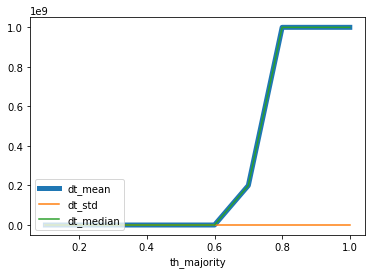

### Feature: th_mode
Before selected best values: {'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


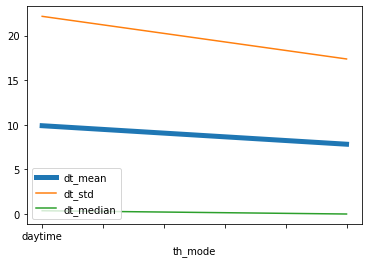

### Feature: th_multiplier
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.0


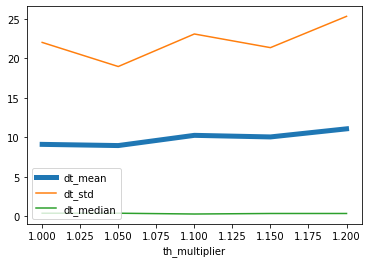

### Feature: mk_size
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


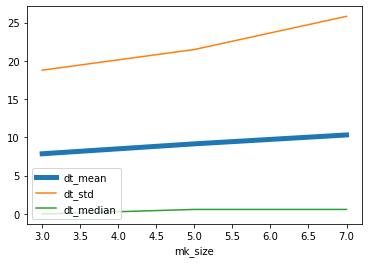

### Feature: alpha
Before selected best values: {'th_majority': 0.1, 'th_mode': 'daytime', 'th_multiplier': 1.0, 'mk_size': 3}
Possible values for this feature: [0.333 0.666 0.999 1.332 1.665 1.998]
Best value for this feature: 0.333


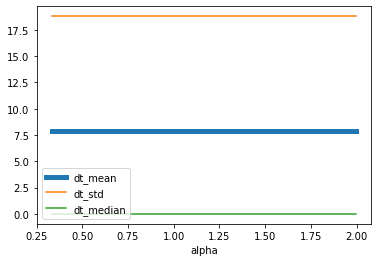

In [56]:
recursive_best_dt(RESULTS_REGR_RIDGE, FEATURES_MODEL_RIDGE, FEATURES_WRAPPER_REGR)

### Feature: weights
Before selected best values: {}
Possible values for this feature: ['distance' 'uniform']
Best value for this feature: uniform


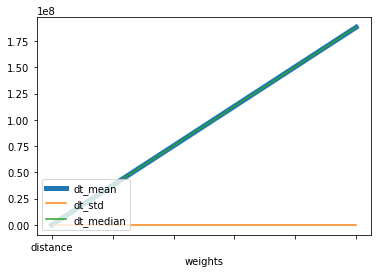

### Feature: th_majority
Before selected best values: {'weights': 'uniform'}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


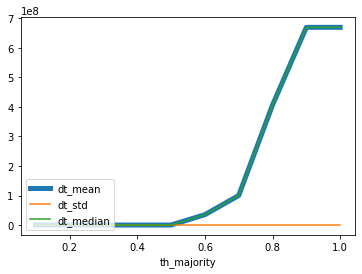

### Feature: th_mode
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


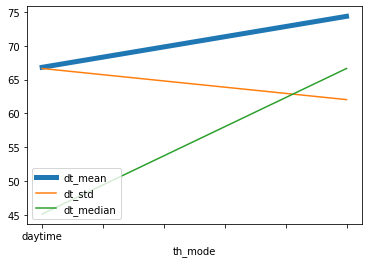

### Feature: n_neighbors
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: [3 5 7 9]
Best value for this feature: 3


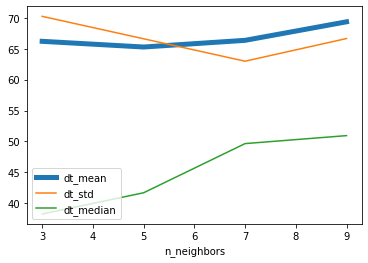

### Feature: mk_size
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1, 'th_mode': 'daytime', 'n_neighbors': 3}
Possible values for this feature: [3 5 7]
Best value for this feature: 7


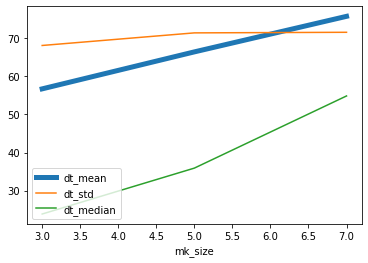

### Feature: th_multiplier
Before selected best values: {'weights': 'uniform', 'th_majority': 0.1, 'th_mode': 'daytime', 'n_neighbors': 3, 'mk_size': 7}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.2


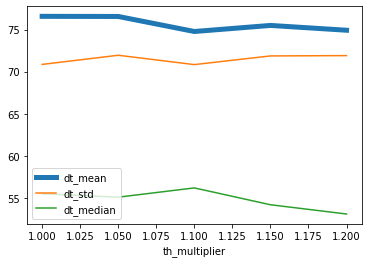

In [57]:
recursive_best_dt(RESULTS_REGR_KNN, FEATURES_MODEL_KNN, FEATURES_WRAPPER_REGR)

### Feature: activation
Before selected best values: {}
Possible values for this feature: ['logistic' 'relu' 'tanh']
Best value for this feature: relu


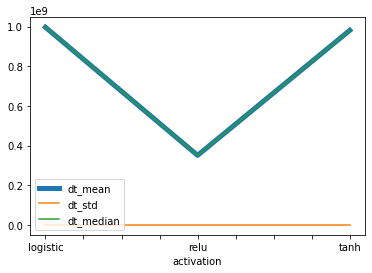

### Feature: th_majority
Before selected best values: {'activation': 'relu'}
Possible values for this feature: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Best value for this feature: 0.1


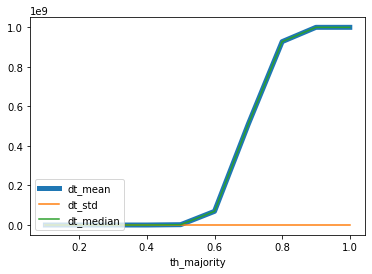

### Feature: th_mode
Before selected best values: {'activation': 'relu', 'th_majority': 0.1}
Possible values for this feature: ['daytime' 'simple']
Best value for this feature: daytime


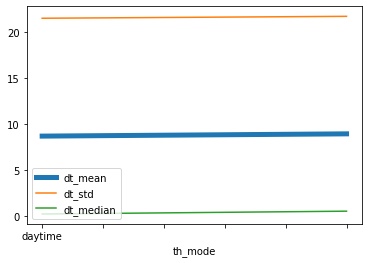

### Feature: hidden_layer_sizes
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime'}
Possible values for this feature: ['(5,)' '(5, 12)' '(5, 24, 18)' '(6, 23)' '(7,)' '(7, 6)' '(8, 12)'
 '(9, 5)' '(9, 8, 8)' '(9, 11)' '(9, 14, 21)' '(9, 20, 22)' '(9, 22, 15)'
 '(10,)' '(10, 8, 5)' '(10, 18, 14)' '(11, 13)' '(12,)' '(13,)' '(14,)'
 '(16, 9, 23)' '(16, 17)' '(18,)' '(19, 12, 19)' '(19, 22, 16)'
 '(20, 20, 15)' '(21,)' '(22, 12)' '(24,)' '(24, 8)']
Best value for this feature: (7, 6)


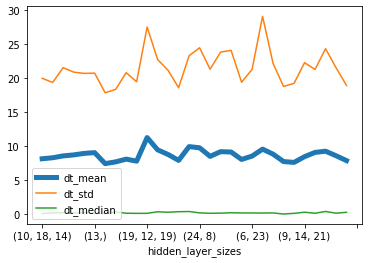

### Feature: th_multiplier
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)'}
Possible values for this feature: [1.   1.05 1.1  1.15 1.2 ]
Best value for this feature: 1.05


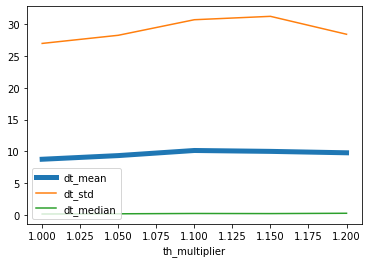

### Feature: mk_size
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)', 'th_multiplier': 1.05}
Possible values for this feature: [3 5 7]
Best value for this feature: 3


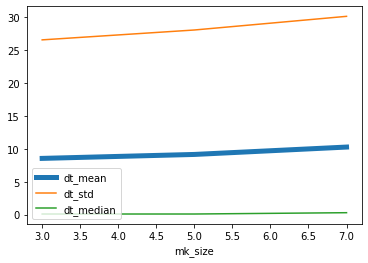

### Feature: learning_rate
Before selected best values: {'activation': 'relu', 'th_majority': 0.1, 'th_mode': 'daytime', 'hidden_layer_sizes': '(7, 6)', 'th_multiplier': 1.05, 'mk_size': 3}
Possible values for this feature: ['adaptive' 'constant']
Best value for this feature: adaptive


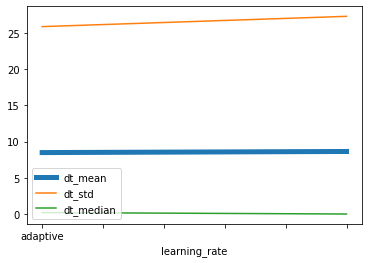

In [80]:
recursive_best_dt(RESULTS_REGR_MLP, FEATURES_MODEL_MLP, FEATURES_WRAPPER_REGR, 'accuracy')